In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np
import scipy
import torch
from torch.utils.data import DataLoader

os.chdir('..')
from data_processing.datasets import PigletDataset
from neuralnet.model import SpectraMLP
from utils import beerlamb_multi
import data_processing.preprocessing as preprocessing
from config import left_cut, right_cut
from torch.utils.data import ConcatDataset
from utils import beerlamb_multi_batch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

ModuleNotFoundError: No module named 'models'

In [3]:
path_to_data = "dataset/piglet_diffs_tests/"
spectra_dataset = PigletDataset(path_to_data)
n = 15
spectra_datasets = ConcatDataset(n * [spectra_dataset])
dl = DataLoader(spectra_datasets, batch_size=n*7830, shuffle=False)
inputs, targets = next(iter(dl))

model = SpectraMLP(4)
#checkpoints = torch.load('model_checkpoints/best_model.pth')
checkpoints = torch.load('results/4_256/best_model.pth', map_location=torch.device('cpu'))
model.load_state_dict(checkpoints)
model.to(device)
model.eval()

/Users/boeykaizhe/opt/anaconda3/envs/i2dl/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


SpectraMLP(
  (layers): ModuleList(
    (0): LazyLinear(in_features=0, out_features=1024, bias=True)
    (1): ELU(alpha=1.0)
    (2): LazyLinear(in_features=0, out_features=1024, bias=True)
    (3): ELU(alpha=1.0)
    (4): LazyLinear(in_features=0, out_features=1024, bias=True)
    (5): ELU(alpha=1.0)
    (6): LazyLinear(in_features=0, out_features=1024, bias=True)
    (7): ELU(alpha=1.0)
    (8): LazyLinear(in_features=0, out_features=4, bias=True)
  )
)

In [4]:
#img = scipy.io.loadmat('dataset/LWP483_10Jan2017_SharedHyperProbe.mat')
img = scipy.io.loadmat('dataset/miniCYRIL-Piglet-Data/LWP512/LWP512_Ws_31Jul_2017_17  16.mat')
img_darkcount = scipy.io.loadmat('dataset/miniCYRIL-Piglet-Data/LWP512/LWP512_DarkCount_31Jul2017.mat')
wavelengths = img['wavelengths'].astype(float)
idx = (wavelengths >= left_cut) & (wavelengths <= right_cut)
wavelengths = wavelengths[idx]

molecules, x = preprocessing.read_molecules(left_cut, right_cut, wavelengths)

In [5]:
%%time

preds = model(inputs.float()).detach().numpy()
print(preds.shape)
print(preds[0])
#beerlamb_multi_batch(molecules, x, preds, left_cut).shape

(117450, 4)
[ 0.0135007  -0.01014652  0.00556785 -0.01592957]
CPU times: user 1.6 s, sys: 734 ms, total: 2.33 s
Wall time: 647 ms


0.0128 [ 0.0135007  -0.01014652  0.00556785 -0.01592957] tensor([ 0.0135, -0.0106,  0.0056, -0.0156], dtype=torch.float64)


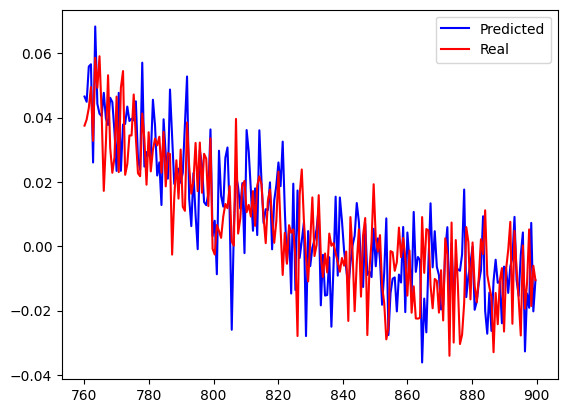

0.0119 [-0.04754029  0.04432032 -0.0371491   0.02711394] tensor([-0.0473,  0.0443, -0.0371,  0.0271], dtype=torch.float64)


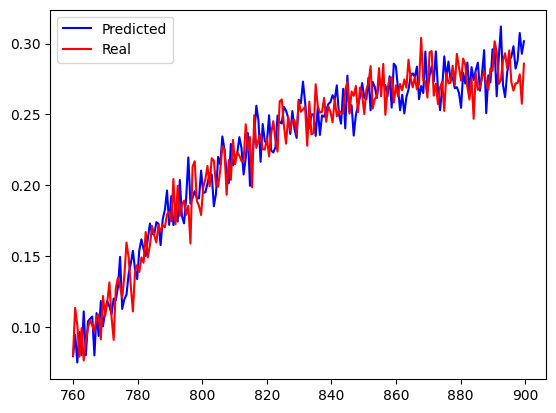

0.0132 [-0.05130717  0.0471632  -0.03620625  0.02695305] tensor([-0.0511,  0.0478, -0.0358,  0.0258], dtype=torch.float64)


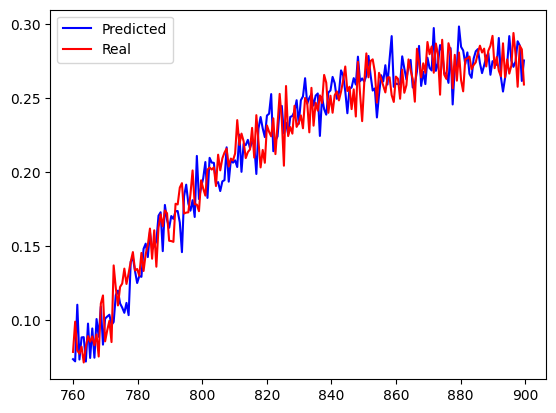

0.014 [-0.06146346  0.0535243  -0.05103374  0.04161423] tensor([-0.0613,  0.0540, -0.0508,  0.0408], dtype=torch.float64)


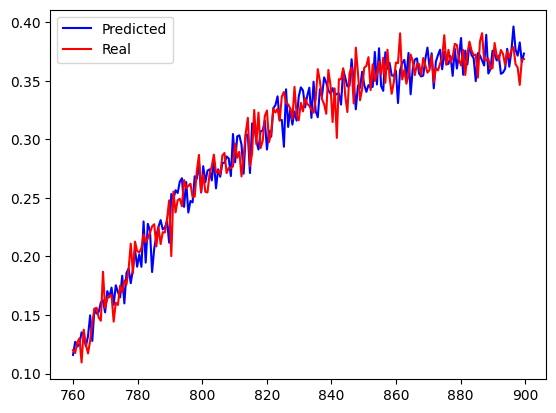

0.013 [-0.05683762  0.05042929 -0.04404985  0.0466451 ] tensor([-0.0567,  0.0495, -0.0446,  0.0482], dtype=torch.float64)


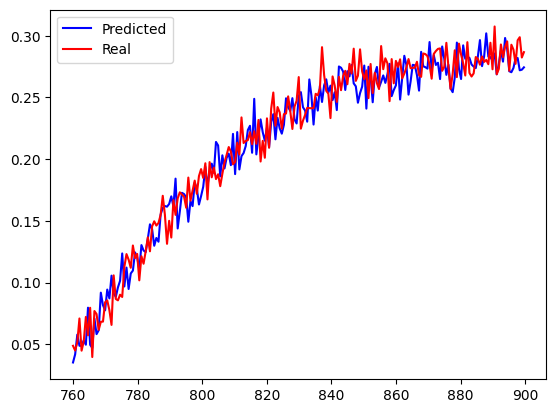

0.0136 [-0.05075155  0.05857974 -0.04292358  0.04559781] tensor([-0.0506,  0.0581, -0.0430,  0.0458], dtype=torch.float64)


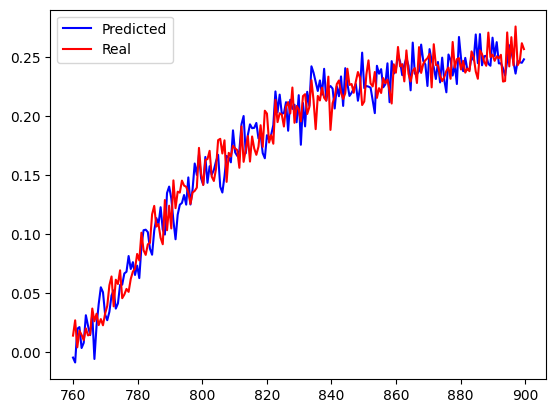

0.0126 [-0.05315502  0.05779696 -0.04246654  0.05115871] tensor([-0.0529,  0.0568, -0.0431,  0.0531], dtype=torch.float64)


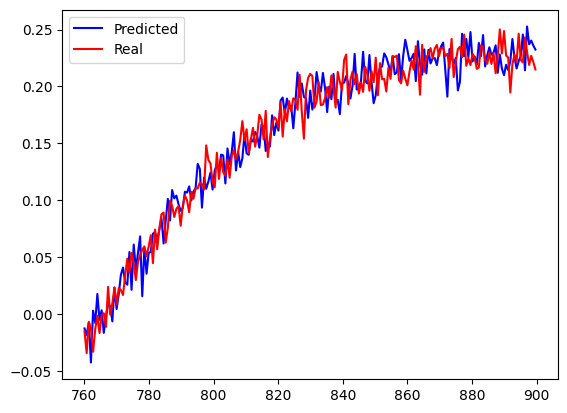

0.0135 [-0.07436412  0.0733564  -0.06323586  0.06022288] tensor([-0.0747,  0.0715, -0.0645,  0.0637], dtype=torch.float64)


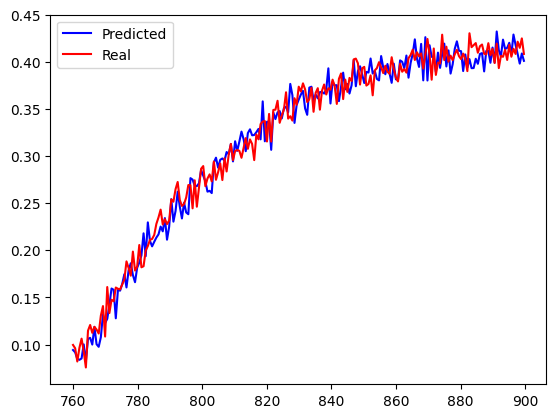

0.0125 [-0.06952     0.0731992  -0.07189921  0.06240275] tensor([-0.0696,  0.0734, -0.0720,  0.0620], dtype=torch.float64)


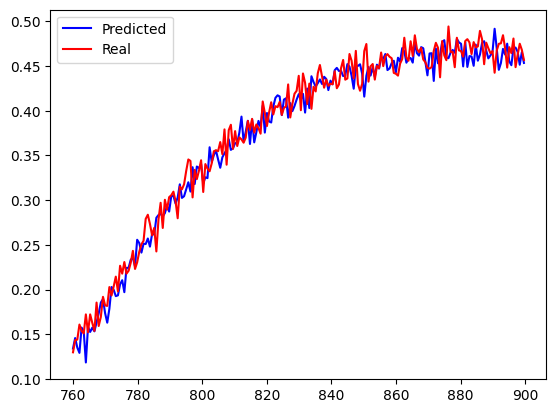

0.0118 [-0.06128087  0.07412453 -0.10235236  0.09227263] tensor([-0.0613,  0.0742, -0.1030,  0.0930], dtype=torch.float64)


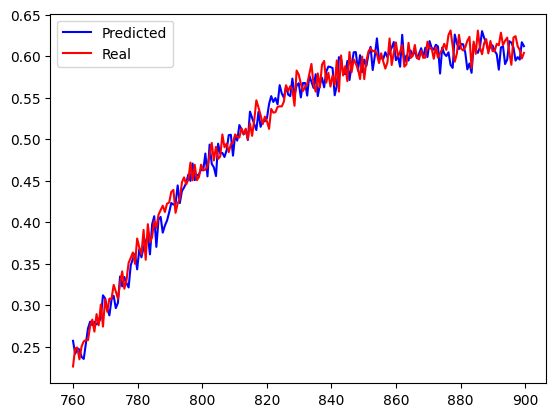

0.0153 [-0.01641213 -0.03725865 -0.02294284  0.03313711] tensor([-0.0161, -0.0381, -0.0240,  0.0340], dtype=torch.float64)


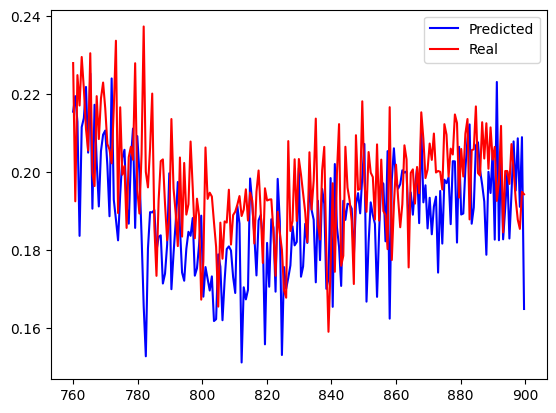

0.0136 [-0.00134193 -0.06931967 -0.01374994  0.00511381] tensor([-0.0007, -0.0691, -0.0134,  0.0034], dtype=torch.float64)


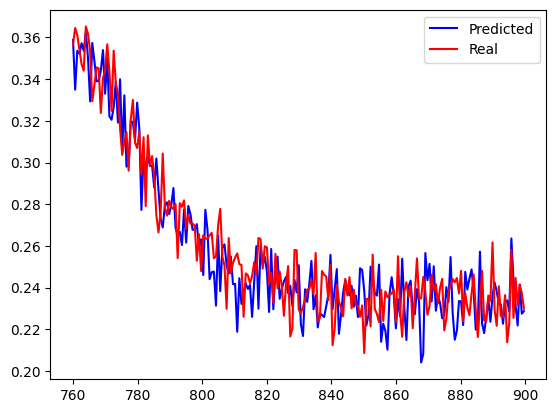

0.0121 [-0.00233559 -0.06492882 -0.02922823  0.0193269 ] tensor([-0.0018, -0.0657, -0.0296,  0.0196], dtype=torch.float64)


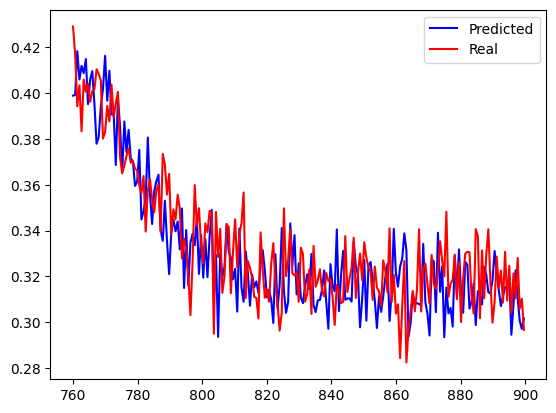

0.0123 [-0.01533036 -0.04797208 -0.04949449  0.03929163] tensor([-0.0150, -0.0485, -0.0499,  0.0399], dtype=torch.float64)


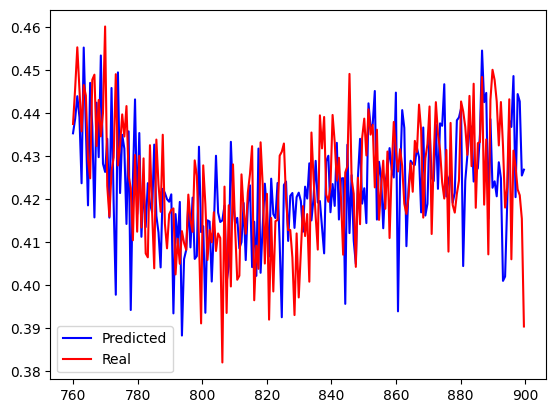

0.0124 [ 0.19790722 -0.19871375  0.06316089 -0.07346432] tensor([ 0.1978, -0.1993,  0.0626, -0.0726], dtype=torch.float64)


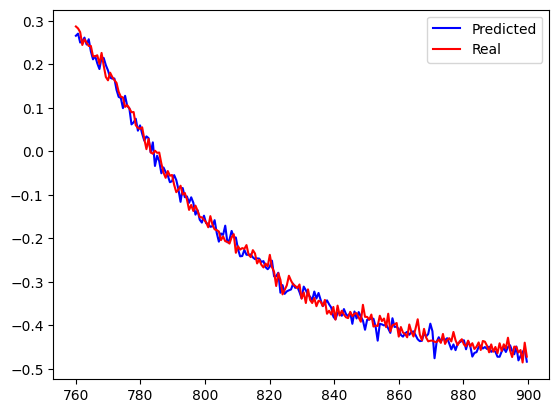

0.0128 [-0.03371099 -0.00202702  0.00887563 -0.00150884] tensor([-0.0338, -0.0016,  0.0092, -0.0022], dtype=torch.float64)


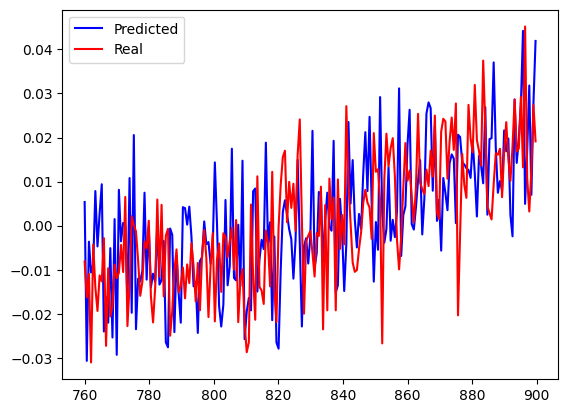

0.0121 [-0.05496217  0.03749422  0.00519778  0.00458592] tensor([-0.0549,  0.0374,  0.0052,  0.0048], dtype=torch.float64)


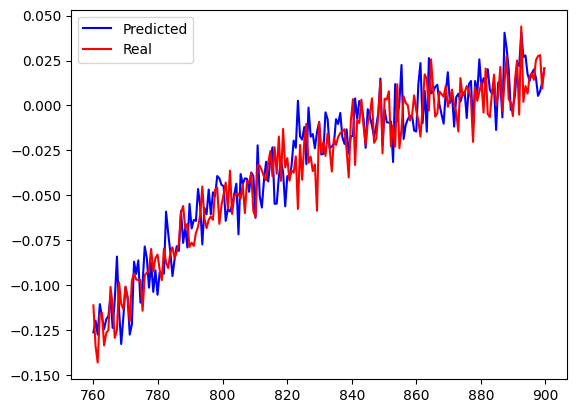

0.0129 [-0.0932259   0.06531379 -0.00773518  0.01197925] tensor([-0.0934,  0.0658, -0.0074,  0.0111], dtype=torch.float64)


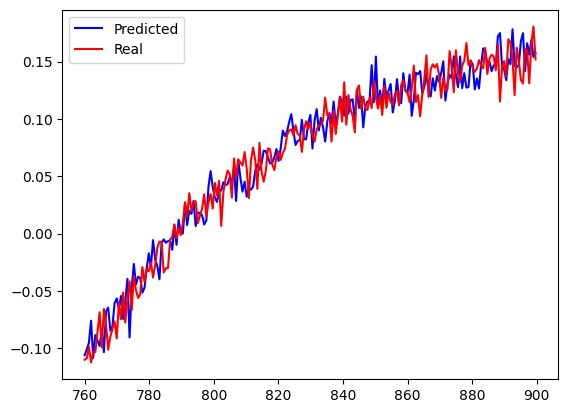

0.0129 [-0.0579309   0.05360708 -0.00293229  0.00720736] tensor([-0.0580,  0.0542, -0.0025,  0.0059], dtype=torch.float64)


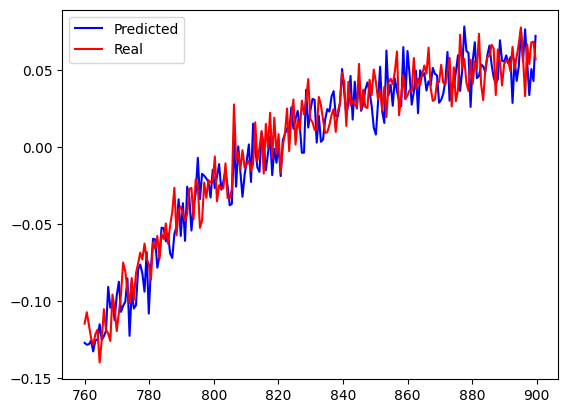

0.0127 [-0.06088618  0.03095549 -0.03847182  0.02877453] tensor([-0.0608,  0.0310, -0.0383,  0.0283], dtype=torch.float64)


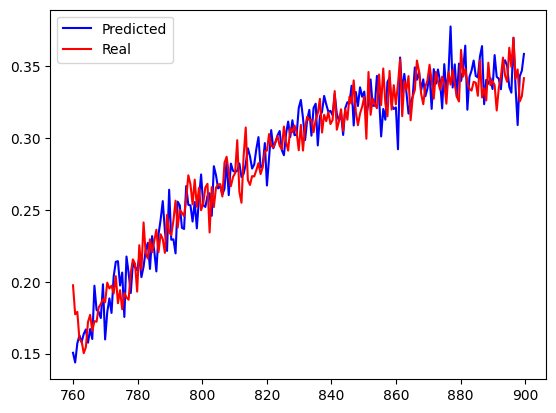

0.0126 [-0.02647913  0.00865514 -0.01406739  0.00384253] tensor([-0.0265,  0.0085, -0.0142,  0.0042], dtype=torch.float64)


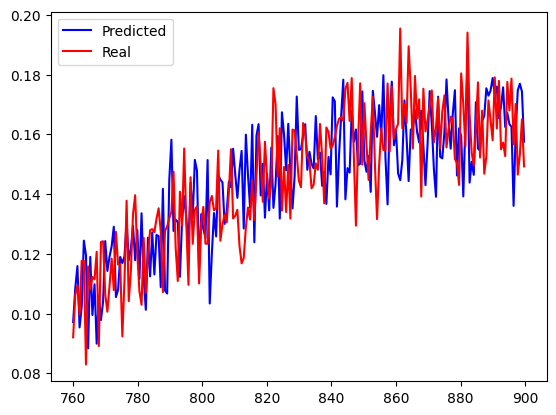

0.0113 [ 0.06819276  0.1106616   0.04900875 -0.03887229] tensor([ 0.0673,  0.1107,  0.0492, -0.0392], dtype=torch.float64)


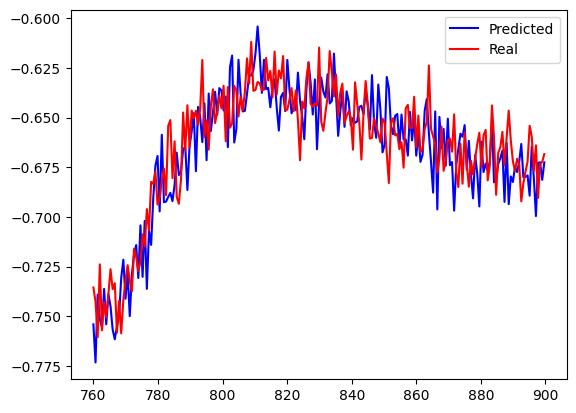

0.0126 [ 0.06870266  0.11516779  0.04683543 -0.03650918] tensor([ 0.0677,  0.1152,  0.0470, -0.0370], dtype=torch.float64)


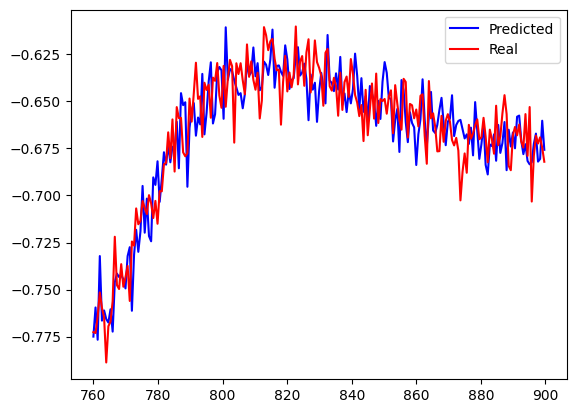

0.0131 [-0.01912579  0.02205851 -0.02603741  0.01580109] tensor([-0.0188,  0.0217, -0.0262,  0.0162], dtype=torch.float64)


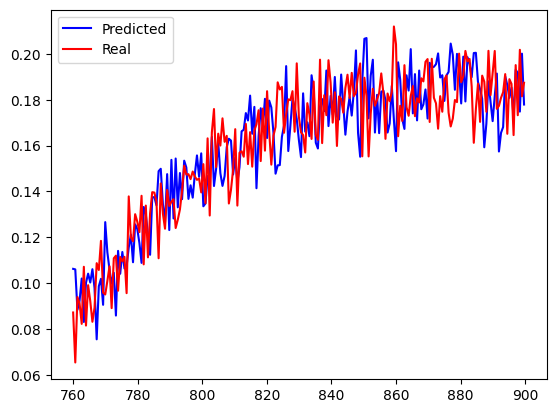

0.0123 [-0.05051989  0.04819295 -0.04140659  0.03157235] tensor([-0.0503,  0.0483, -0.0414,  0.0314], dtype=torch.float64)


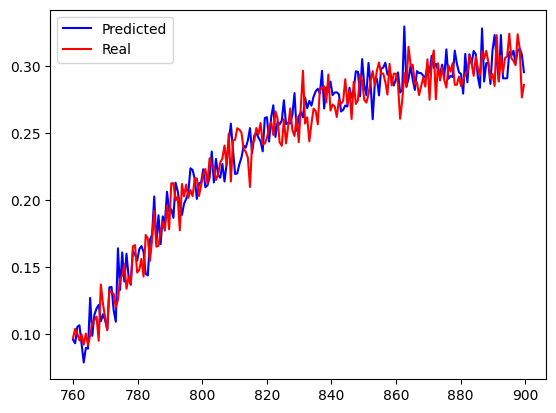

0.0119 [-0.04517242  0.03814211 -0.04937129  0.03908951] tensor([-0.0450,  0.0381, -0.0494,  0.0394], dtype=torch.float64)


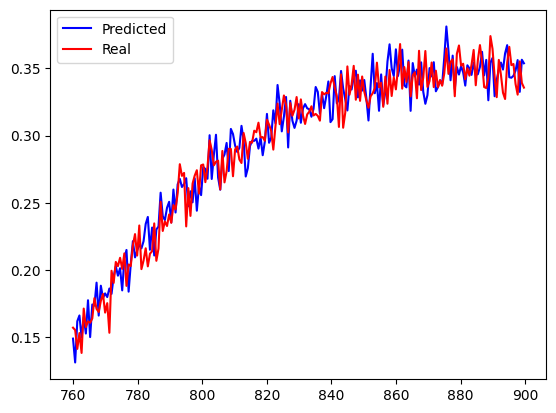

0.0119 [-0.0679688   0.05342538 -0.05016558  0.04091103] tensor([-0.0676,  0.0540, -0.0498,  0.0399], dtype=torch.float64)


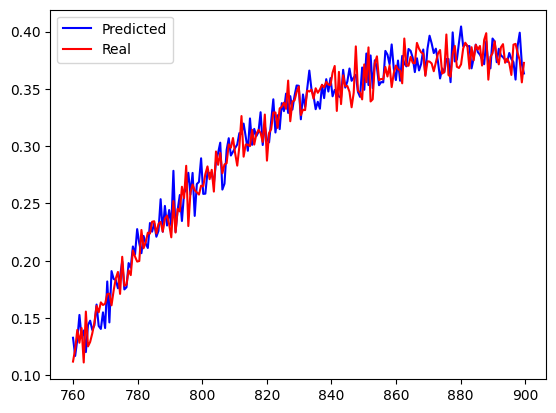

0.0135 [-0.06136526  0.07740311 -0.04704261  0.04201039] tensor([-0.0615,  0.0765, -0.0476,  0.0437], dtype=torch.float64)


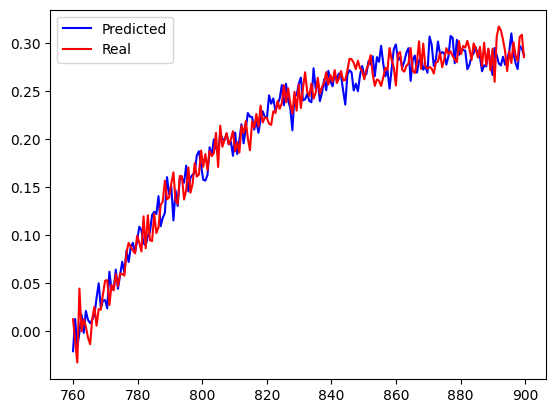

0.0125 [-0.03973822  0.04488035 -0.03573725  0.04250607] tensor([-0.0395,  0.0447, -0.0358,  0.0428], dtype=torch.float64)


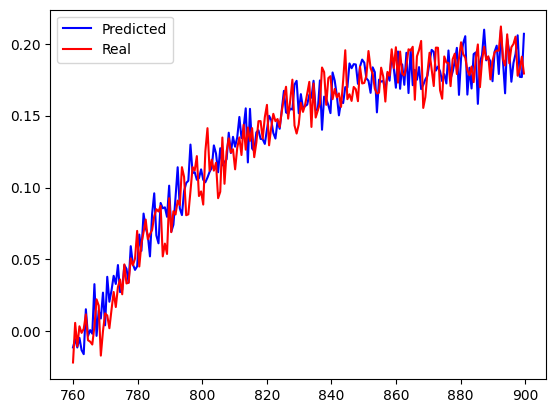

0.0122 [-0.06808617  0.06088297 -0.05389394  0.05361879] tensor([-0.0682,  0.0596, -0.0546,  0.0557], dtype=torch.float64)


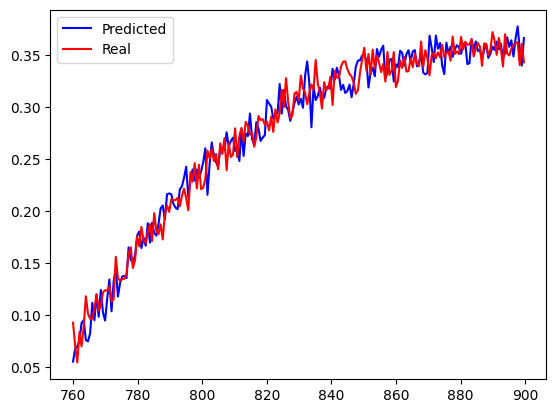

0.0128 [-0.07232366  0.07189323 -0.06969316  0.0608985 ] tensor([-0.0723,  0.0717, -0.0700,  0.0613], dtype=torch.float64)


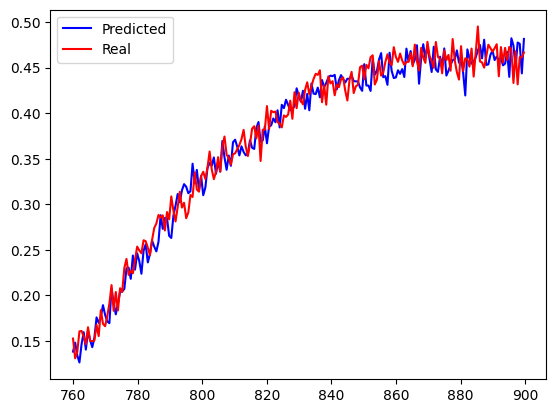

0.0125 [-0.07070971  0.07746009 -0.07846102  0.06890949] tensor([-0.0708,  0.0772, -0.0787,  0.0687], dtype=torch.float64)


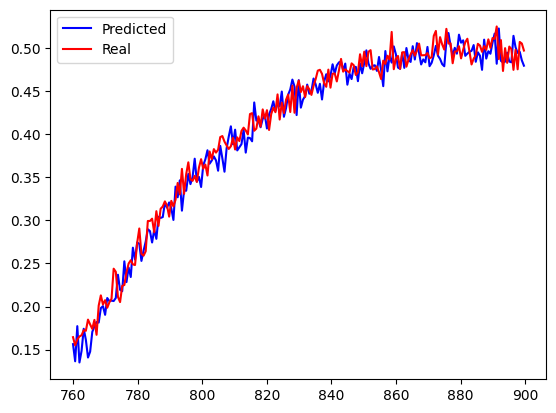

0.0127 [-0.05712746  0.05277879 -0.07359858  0.06339305] tensor([-0.0575,  0.0526, -0.0738,  0.0638], dtype=torch.float64)


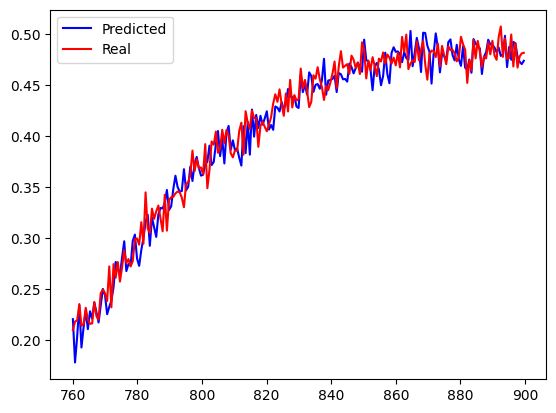

0.0141 [ 0.06203844  0.01091671  0.01790088 -0.00663026] tensor([ 0.0646,  0.0101,  0.0170, -0.0070], dtype=torch.float64)


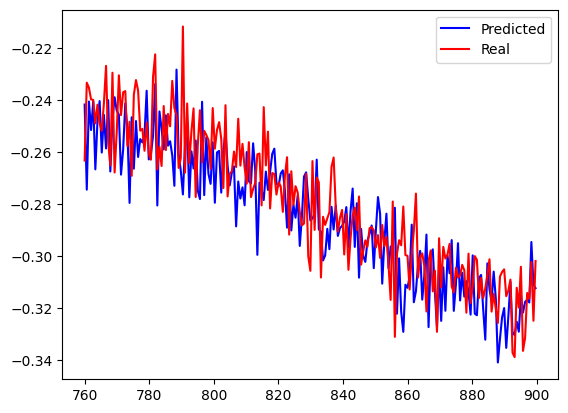

0.0141 [-0.00175989 -0.05954861 -0.01705968  0.00763464] tensor([-0.0014, -0.0598, -0.0170,  0.0070], dtype=torch.float64)


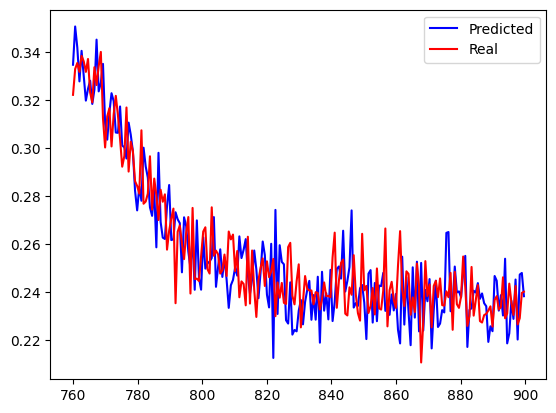

0.0122 [ 0.00613159 -0.07752641 -0.02467532  0.01405577] tensor([ 0.0068, -0.0787, -0.0251,  0.0151], dtype=torch.float64)


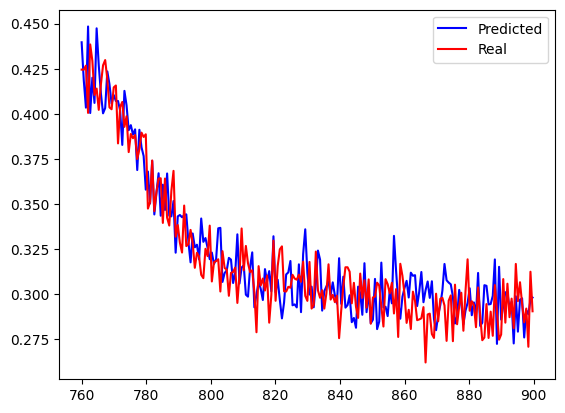

0.0156 [ 0.01727818 -0.05080188 -0.03610409  0.03276323] tensor([ 0.0176, -0.0522, -0.0376,  0.0344], dtype=torch.float64)


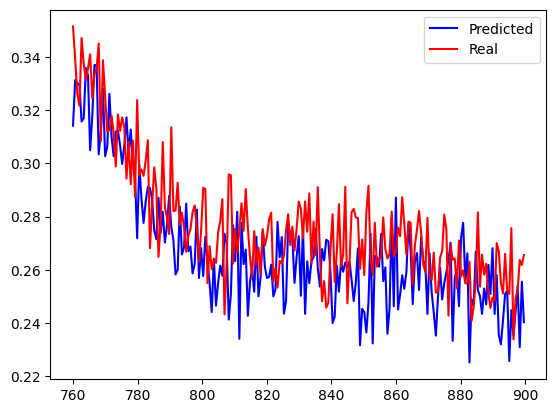

0.0133 [-0.01111788 -0.01160589  0.00056942 -0.00799056] tensor([-0.0111, -0.0113,  0.0008, -0.0089], dtype=torch.float64)


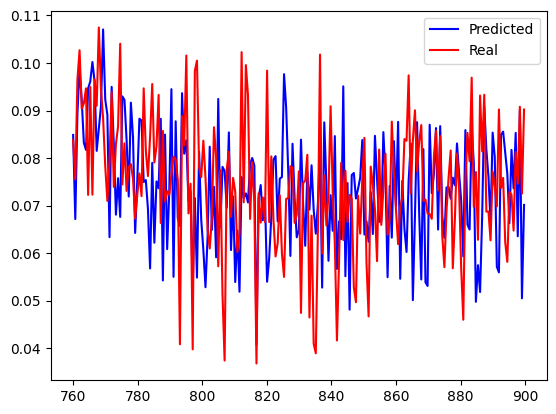

0.0124 [-0.01640718 -0.00951173  0.00545729 -0.01511429] tensor([-0.0163, -0.0094,  0.0056, -0.0156], dtype=torch.float64)


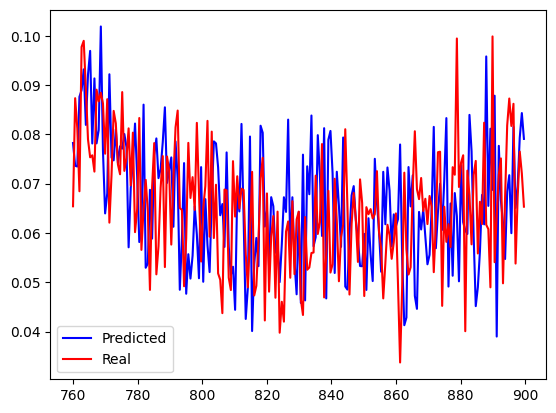

0.0133 [-0.08506655  0.07289309 -0.00751478  0.00940602] tensor([-0.0851,  0.0732, -0.0073,  0.0089], dtype=torch.float64)


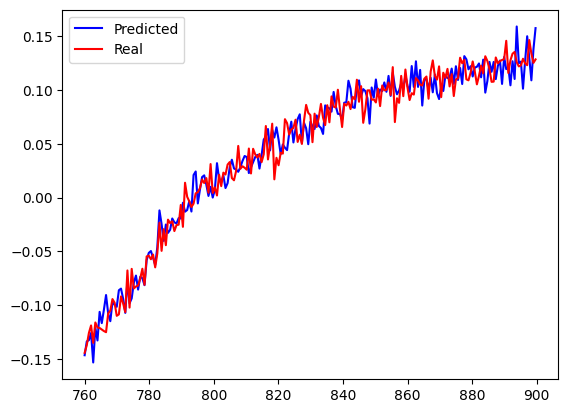

0.0129 [-0.04984484  0.06786387  0.00544766  0.00481566] tensor([-0.0500,  0.0681,  0.0056,  0.0044], dtype=torch.float64)


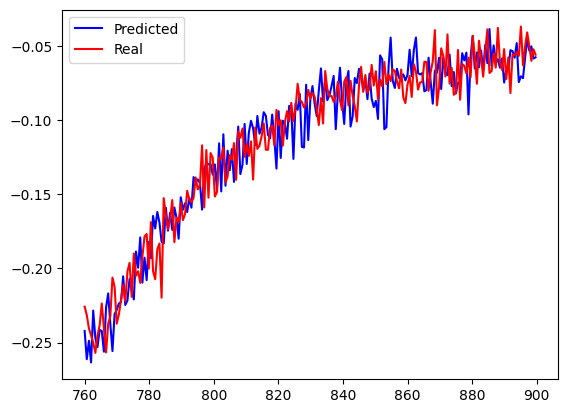

0.0134 [-0.07533731  0.04857523 -0.01883359  0.00840521] tensor([-0.0749,  0.0481, -0.0191,  0.0091], dtype=torch.float64)


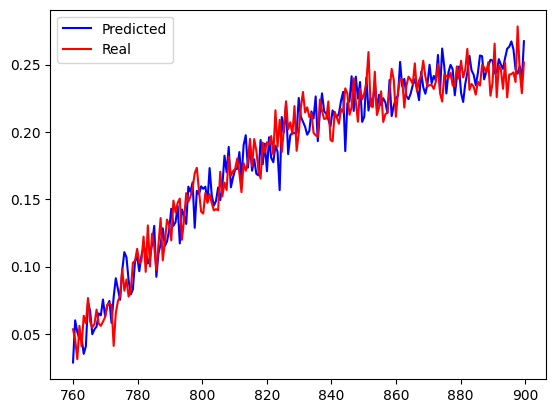

0.0132 [-0.05200666  0.03953273 -0.0123987   0.00458497] tensor([-0.0519,  0.0396, -0.0124,  0.0045], dtype=torch.float64)


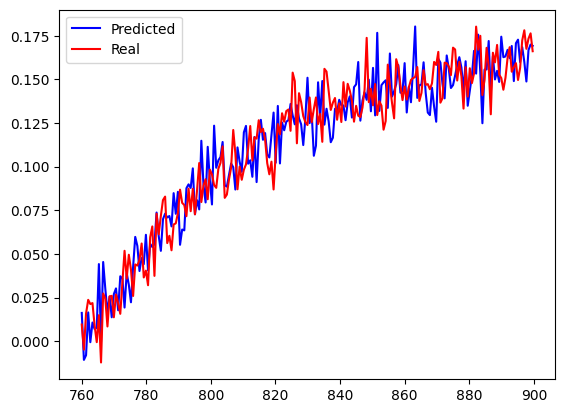

0.0121 [ 0.07399263  0.10221931  0.0506579  -0.04041452] tensor([ 0.0731,  0.1023,  0.0509, -0.0409], dtype=torch.float64)


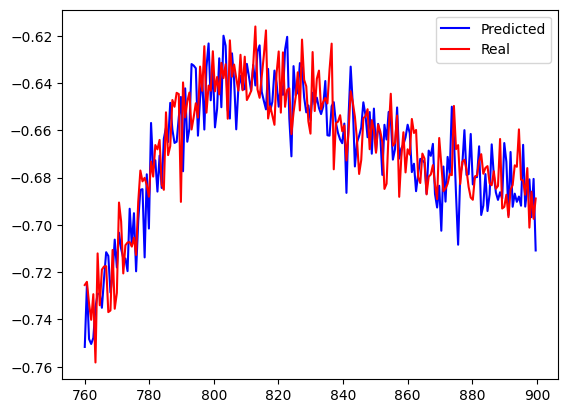

0.0136 [ 0.06798343  0.08663084  0.0361155  -0.0254    ] tensor([ 0.0671,  0.0871,  0.0366, -0.0266], dtype=torch.float64)


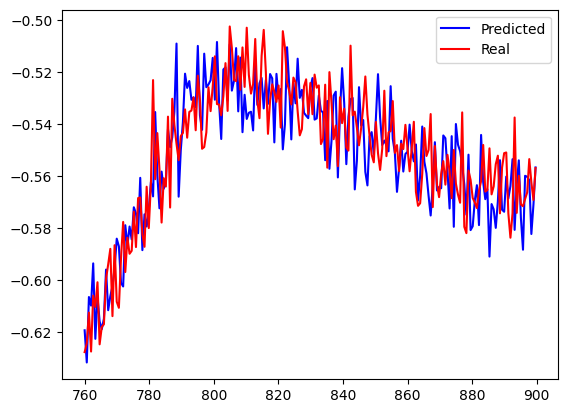

0.012 [-0.04999111  0.01629315  0.00233767  0.00766253] tensor([-0.0500,  0.0162,  0.0025,  0.0075], dtype=torch.float64)


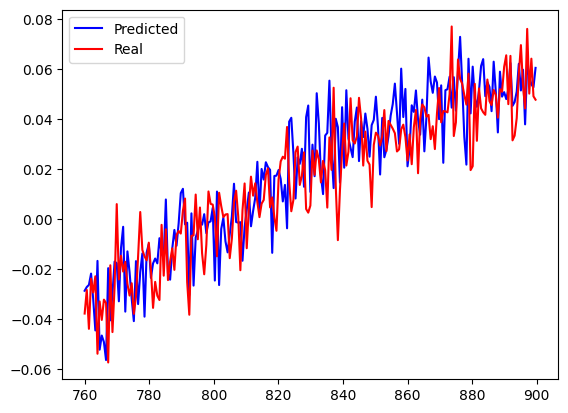

0.0126 [-0.0503047   0.04663478 -0.03823578  0.02790459] tensor([-0.0500,  0.0466, -0.0384,  0.0284], dtype=torch.float64)


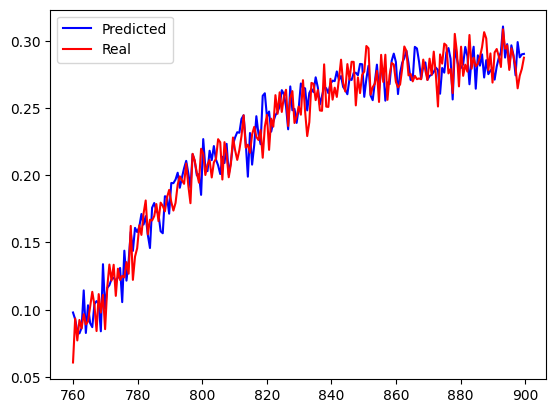

0.0127 [-0.0454585   0.04334191 -0.04039533  0.029813  ] tensor([-0.0453,  0.0430, -0.0406,  0.0306], dtype=torch.float64)


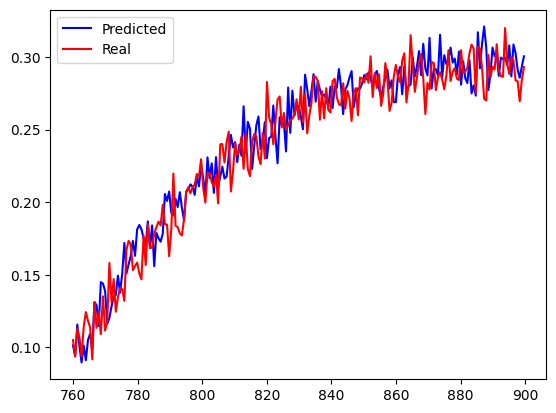

0.0127 [-0.05844395  0.04820903 -0.05610228  0.04585749] tensor([-0.0583,  0.0481, -0.0561,  0.0461], dtype=torch.float64)


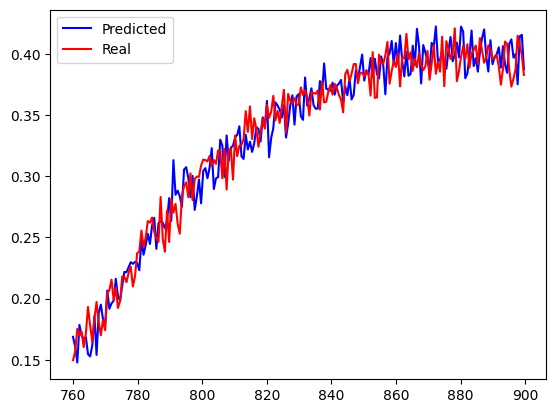

0.0134 [-0.06372654  0.07237427 -0.05108486  0.0574143 ] tensor([-0.0634,  0.0722, -0.0513,  0.0577], dtype=torch.float64)


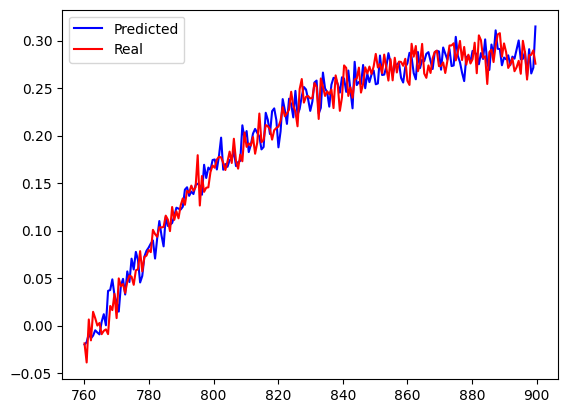

0.0137 [-0.0620548   0.0785903  -0.04889412  0.05868853] tensor([-0.0619,  0.0782, -0.0493,  0.0593], dtype=torch.float64)


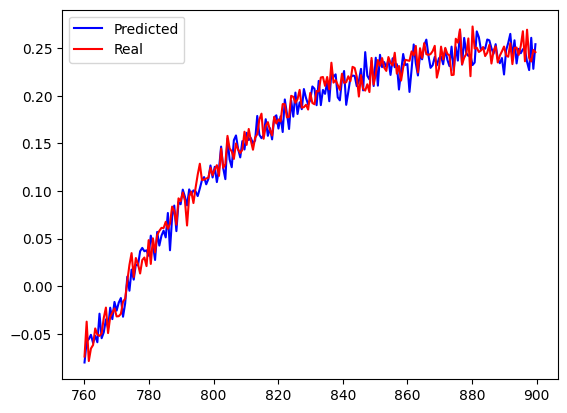

0.011 [-0.04802769  0.05175794 -0.0390713   0.04649986] tensor([-0.0477,  0.0515, -0.0391,  0.0468], dtype=torch.float64)


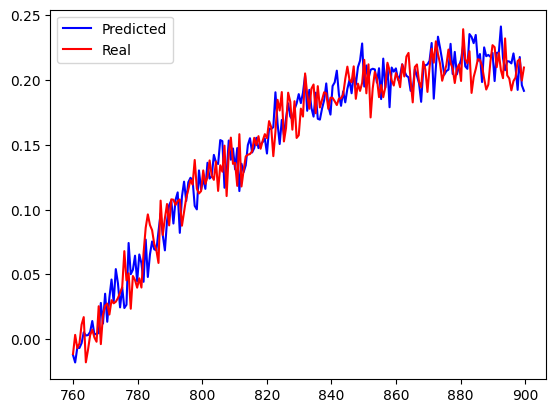

0.0126 [-0.07227989  0.07489896 -0.07052678  0.06549825] tensor([-0.0724,  0.0722, -0.0723,  0.0704], dtype=torch.float64)


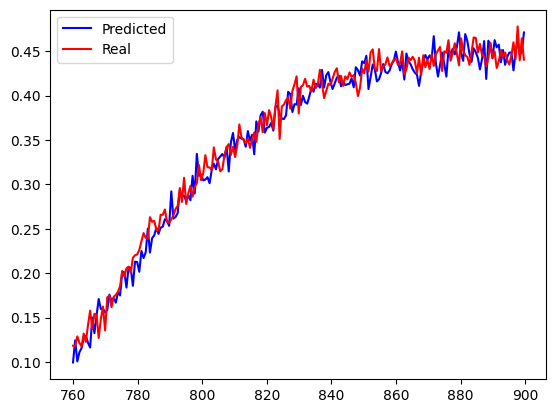

0.0126 [-0.06912971  0.07490316 -0.08049116  0.07032463] tensor([-0.0693,  0.0747, -0.0809,  0.0709], dtype=torch.float64)


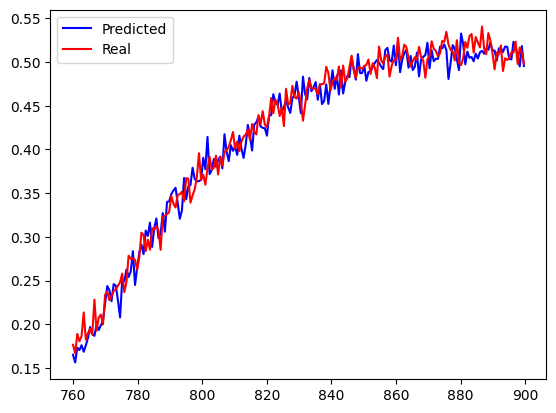

0.0125 [-0.0598812   0.06592272 -0.08851225  0.07815687] tensor([-0.0601,  0.0655, -0.0889,  0.0789], dtype=torch.float64)


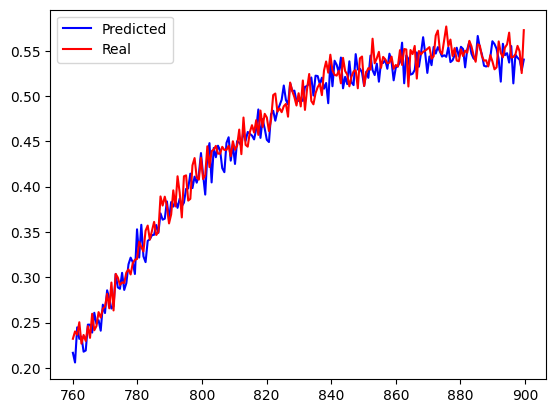

0.0139 [-0.00567608 -0.06183907 -0.02485935  0.02961127] tensor([-0.0050, -0.0626, -0.0257,  0.0298], dtype=torch.float64)


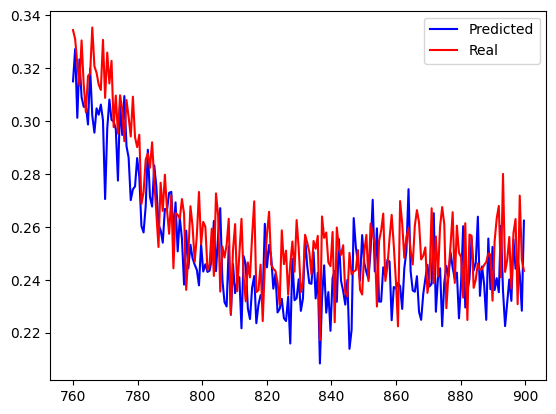

0.0122 [-0.0098593  -0.05616692 -0.01593589  0.00692451] tensor([-0.0093, -0.0560, -0.0157,  0.0057], dtype=torch.float64)


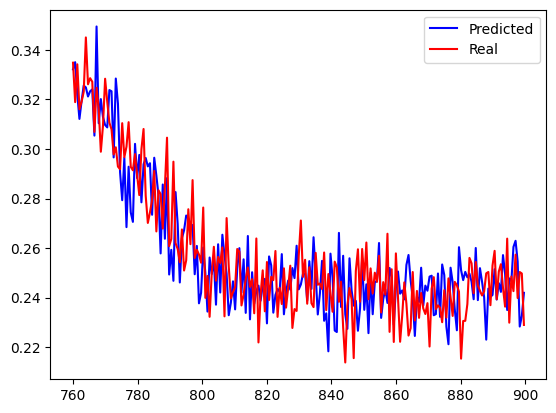

0.0116 [-0.00251537 -0.06018768 -0.02518     0.01575985] tensor([-0.0021, -0.0605, -0.0254,  0.0154], dtype=torch.float64)


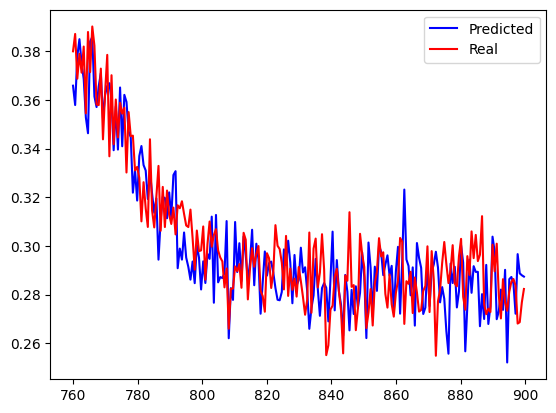

0.012 [-0.0086608  -0.04090137 -0.03102569  0.02073062] tensor([-0.0083, -0.0413, -0.0314,  0.0214], dtype=torch.float64)


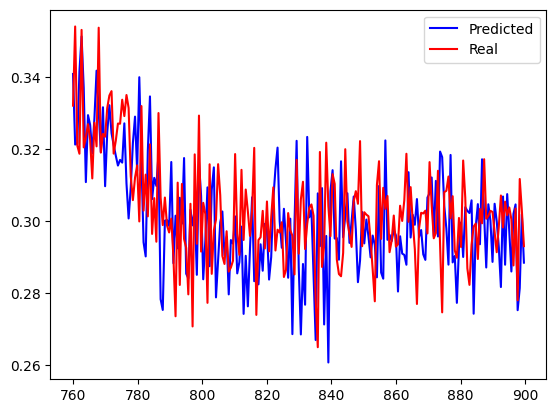

0.0121 [-0.062727    0.03862808 -0.01658448  0.01787831] tensor([-0.0631,  0.0385, -0.0165,  0.0180], dtype=torch.float64)


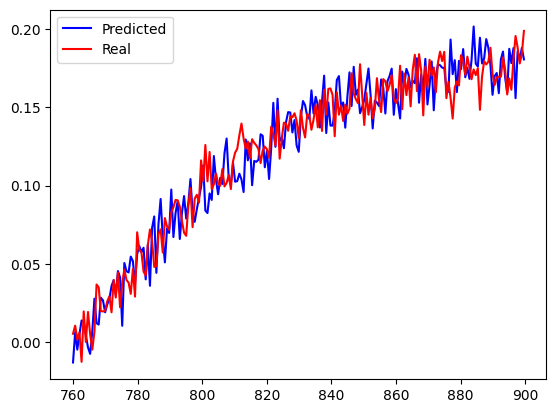

0.0141 [-0.03236281  0.00061816  0.0102677  -0.01620316] tensor([-0.0327,  0.0004,  0.0103, -0.0161], dtype=torch.float64)


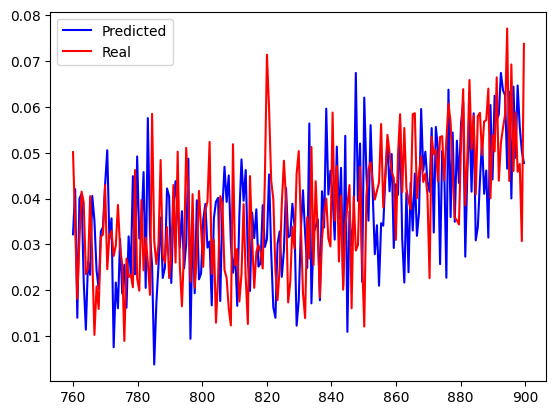

0.0123 [-0.05114995  0.04148597  0.00782796  0.00205227] tensor([-0.0512,  0.0414,  0.0079,  0.0021], dtype=torch.float64)


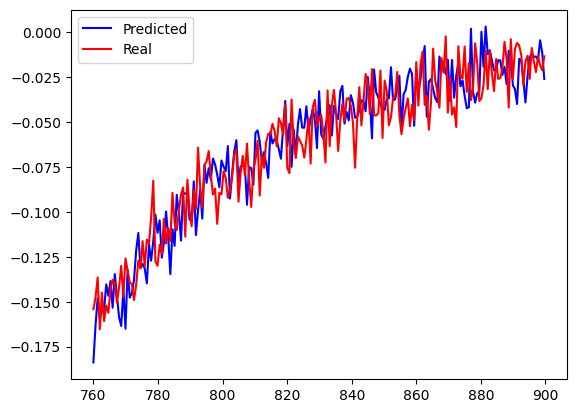

0.0121 [-0.08910337  0.05744462 -0.00632348  0.00774436] tensor([-0.0893,  0.0578, -0.0060,  0.0072], dtype=torch.float64)


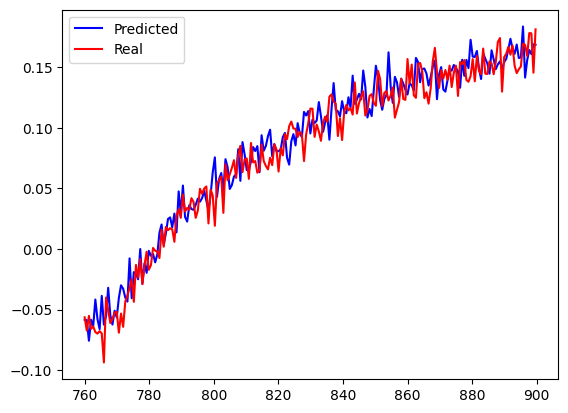

0.0127 [-0.09947775  0.08596832 -0.02429461  0.01369296] tensor([-0.0993,  0.0856, -0.0244,  0.0144], dtype=torch.float64)


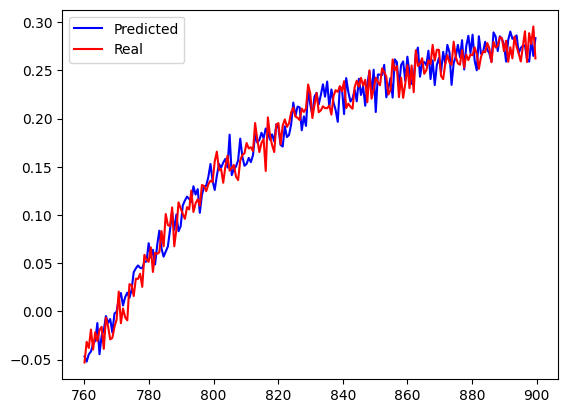

0.0131 [-0.05849857  0.02523615 -0.03114276  0.021321  ] tensor([-0.0583,  0.0253, -0.0311,  0.0211], dtype=torch.float64)


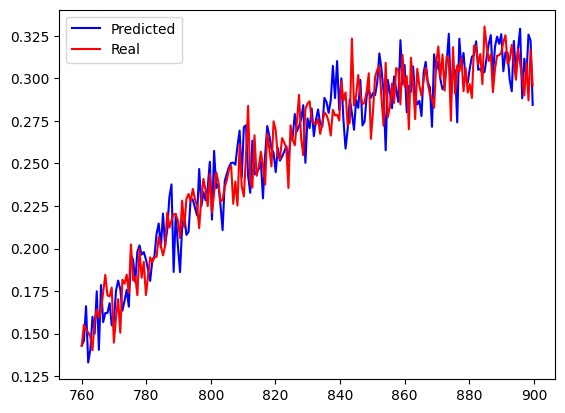

0.0133 [-0.02572506  0.00183079 -0.01909089  0.00919569] tensor([-0.0259,  0.0019, -0.0191,  0.0091], dtype=torch.float64)


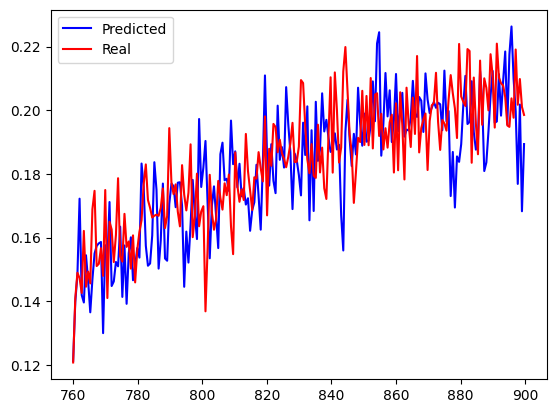

0.0128 [ 0.06527609  0.11265566  0.0474754  -0.03723824] tensor([ 0.0644,  0.1126,  0.0476, -0.0376], dtype=torch.float64)


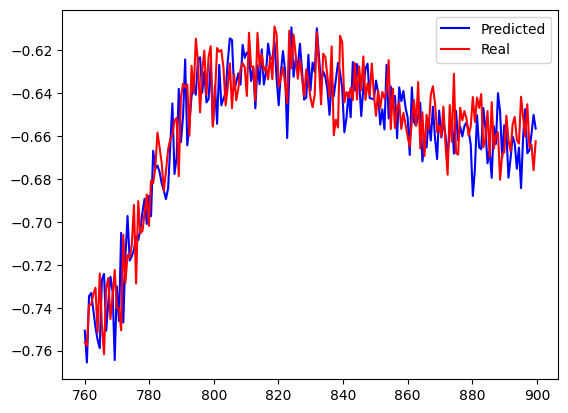

0.0136 [ 0.0633065   0.11417297  0.04530215 -0.03499187] tensor([ 0.0623,  0.1143,  0.0455, -0.0355], dtype=torch.float64)


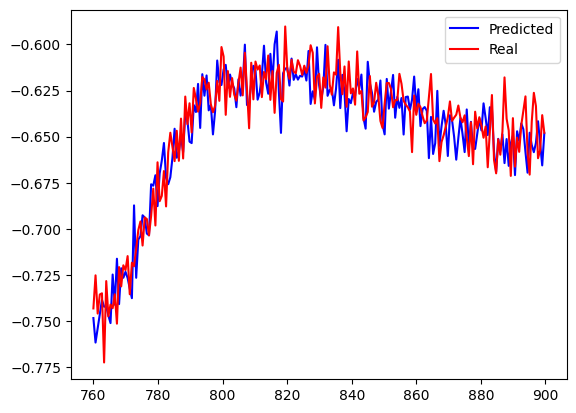

0.0127 [-0.03207301  0.02880265 -0.03021997  0.02346107] tensor([-0.0321,  0.0280, -0.0306,  0.0247], dtype=torch.float64)


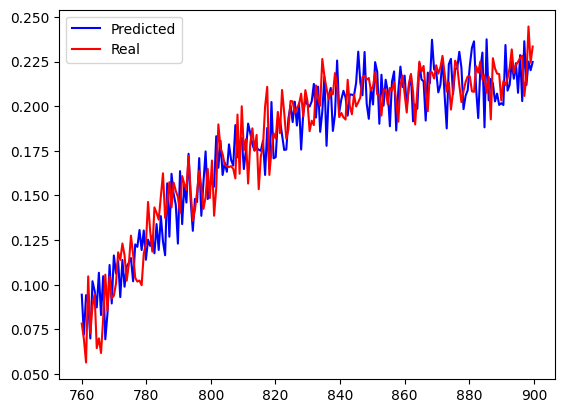

0.0128 [-0.04772793  0.04620494 -0.03475214  0.02632984] tensor([-0.0476,  0.0460, -0.0348,  0.0265], dtype=torch.float64)


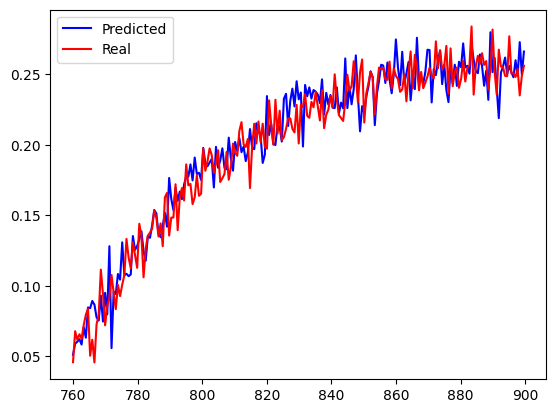

0.0132 [-0.04855718  0.04360192 -0.05280889  0.04268328] tensor([-0.0486,  0.0435, -0.0528,  0.0428], dtype=torch.float64)


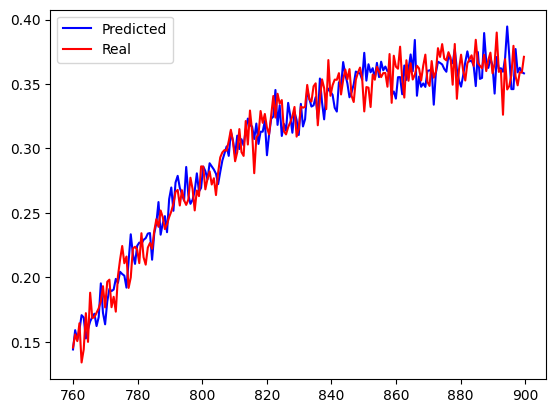

0.0129 [-0.07495452  0.0599712  -0.05038266  0.06031389] tensor([-0.0748,  0.0597, -0.0505,  0.0605], dtype=torch.float64)


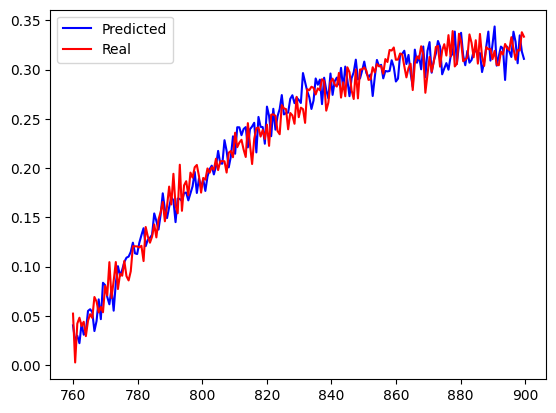

0.0118 [-0.05685268  0.0645872  -0.04755213  0.04835601] tensor([-0.0567,  0.0636, -0.0481,  0.0499], dtype=torch.float64)


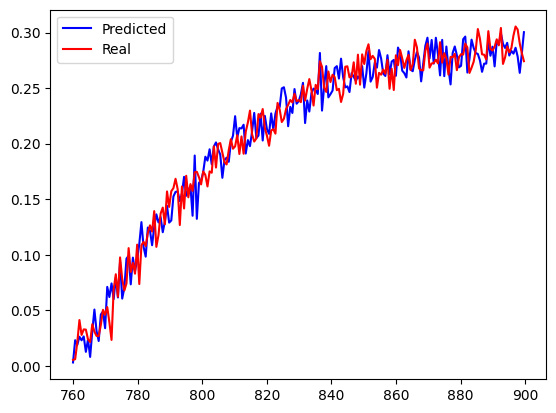

0.0115 [-0.05572276  0.06315434 -0.04023769  0.04861922] tensor([-0.0555,  0.0626, -0.0406,  0.0496], dtype=torch.float64)


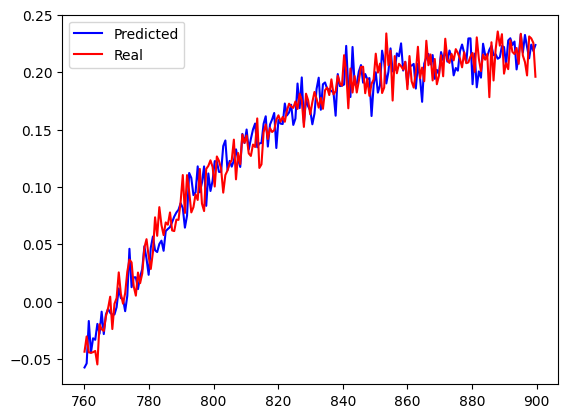

0.0123 [-0.06739043  0.0666316  -0.05201953  0.0444985 ] tensor([-0.0674,  0.0667, -0.0522,  0.0446], dtype=torch.float64)


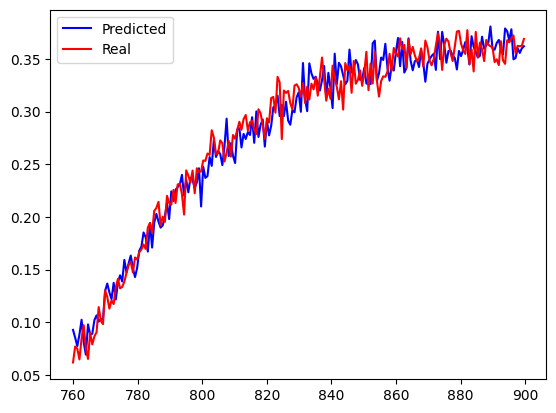

0.0123 [-0.07518171  0.07428863 -0.07078715  0.06125911] tensor([-0.0752,  0.0745, -0.0709,  0.0609], dtype=torch.float64)


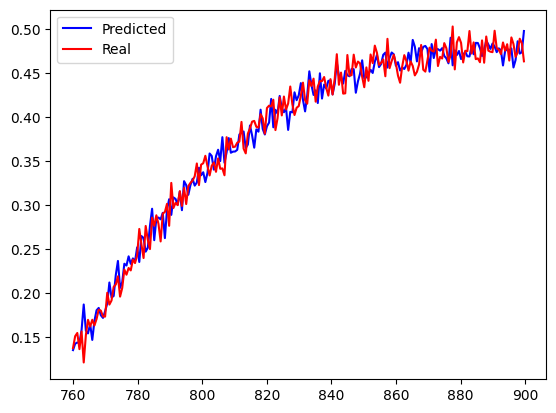

0.0131 [-0.06775194  0.07612766 -0.07903433  0.06950888] tensor([-0.0679,  0.0761, -0.0793,  0.0693], dtype=torch.float64)


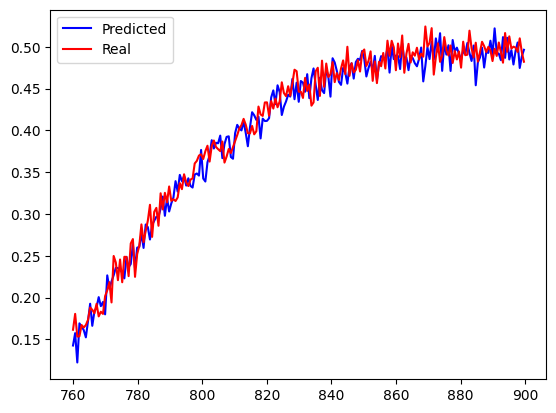

0.0133 [-0.05703302  0.05206434 -0.07534092  0.06510075] tensor([-0.0572,  0.0519, -0.0755,  0.0655], dtype=torch.float64)


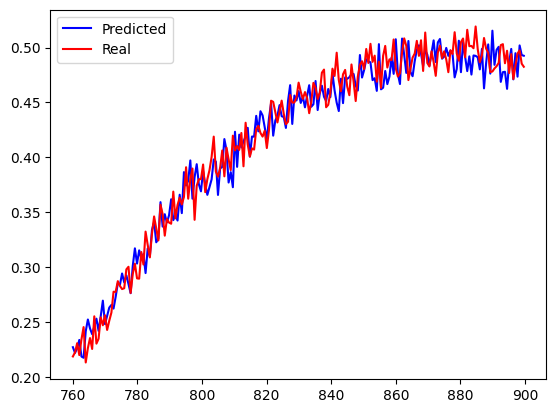

0.0129 [0.05653339 0.00699112 0.00805958 0.00254506] tensor([0.0586, 0.0060, 0.0070, 0.0030], dtype=torch.float64)


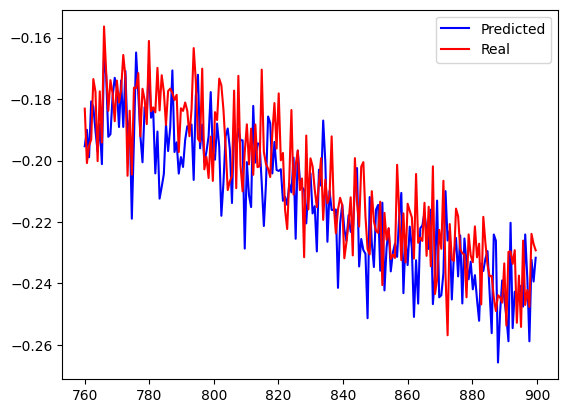

0.0125 [-0.00688756 -0.06235797 -0.02301589  0.01260359] tensor([-0.0063, -0.0633, -0.0233,  0.0133], dtype=torch.float64)


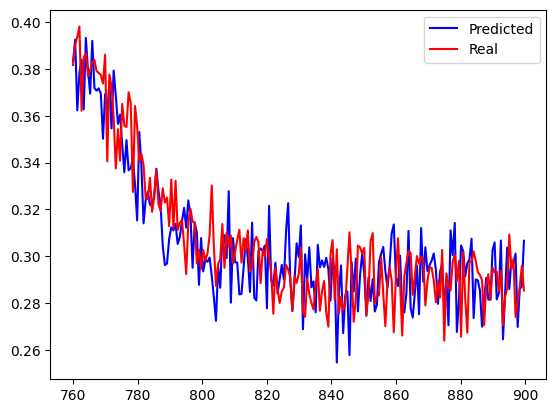

0.012 [ 0.01632632 -0.08110561 -0.01939431  0.00891639] tensor([ 0.0169, -0.0822, -0.0199,  0.0099], dtype=torch.float64)


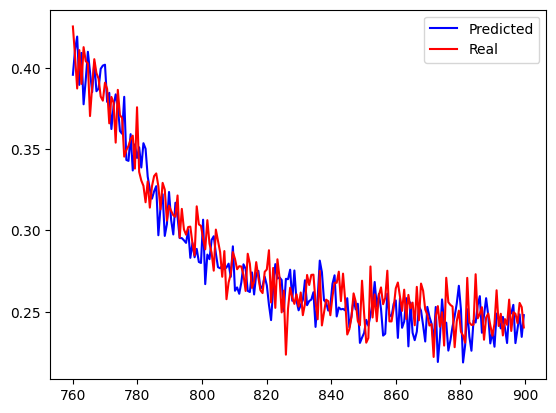

0.0138 [ 0.00853948 -0.03428476 -0.04492031  0.03518032] tensor([ 0.0086, -0.0349, -0.0456,  0.0356], dtype=torch.float64)


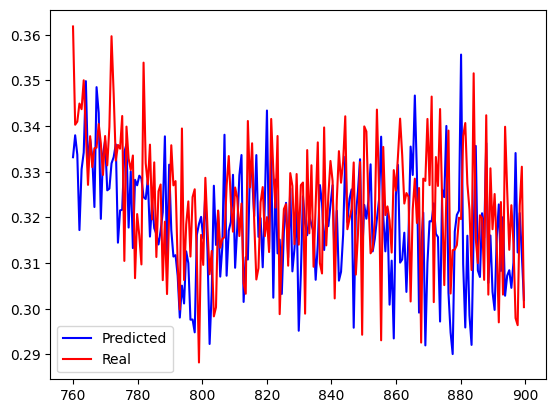

0.0128 [-0.02310469 -0.00788452  0.00660789 -0.0131439 ] tensor([-0.0232, -0.0076,  0.0068, -0.0137], dtype=torch.float64)


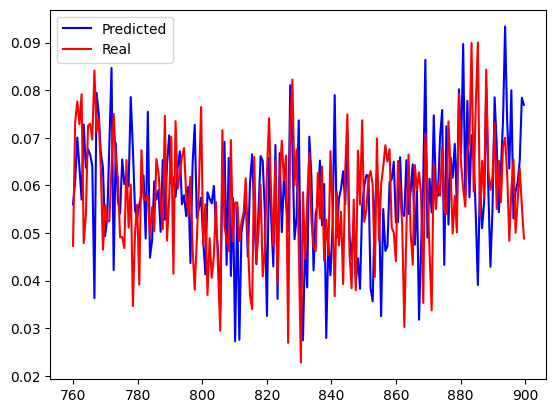

0.0128 [-0.01094178 -0.00137813  0.00985093 -0.01721621] tensor([-0.0111, -0.0011,  0.0101, -0.0180], dtype=torch.float64)


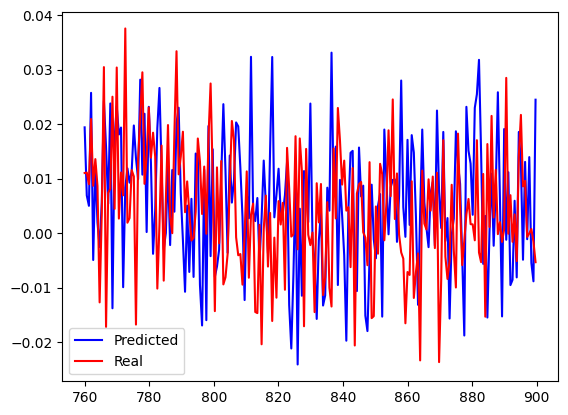

0.0124 [-0.08465534  0.0605993  -0.00394718  0.00751287] tensor([-0.0848,  0.0610, -0.0036,  0.0067], dtype=torch.float64)


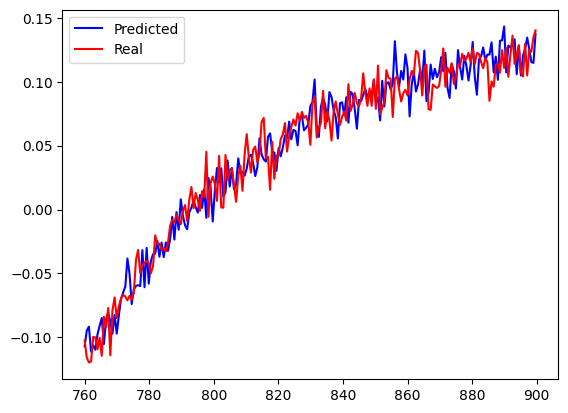

0.0138 [-0.05667875  0.05117174 -0.00289687  0.0013162 ] tensor([-0.0570,  0.0506, -0.0030,  0.0020], dtype=torch.float64)


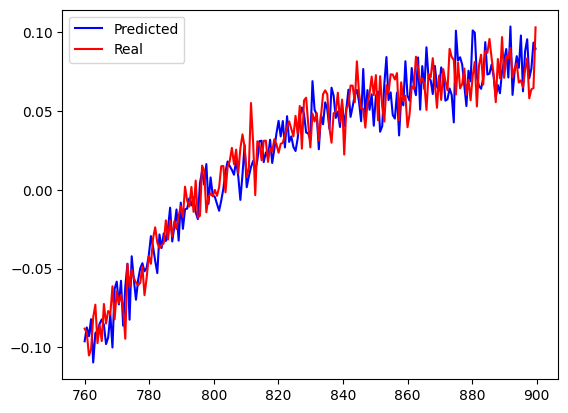

0.0132 [-0.04027698  0.00141919 -0.02659118  0.01697944] tensor([-0.0404,  0.0016, -0.0264,  0.0164], dtype=torch.float64)


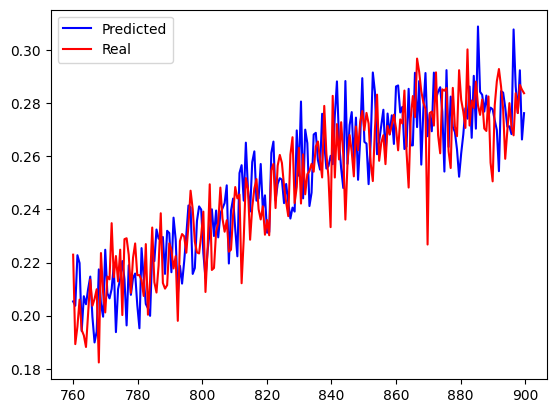

0.0133 [-0.04968926  0.0380196  -0.01346463  0.00334523] tensor([-0.0497,  0.0379, -0.0135,  0.0035], dtype=torch.float64)


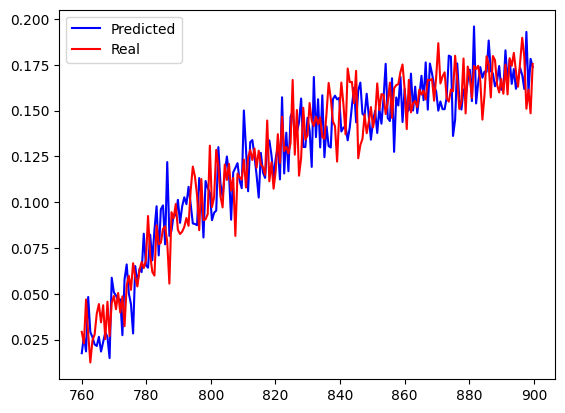

0.014 [ 0.07048354  0.10672002  0.04917425 -0.03896235] tensor([ 0.0695,  0.1068,  0.0494, -0.0394], dtype=torch.float64)


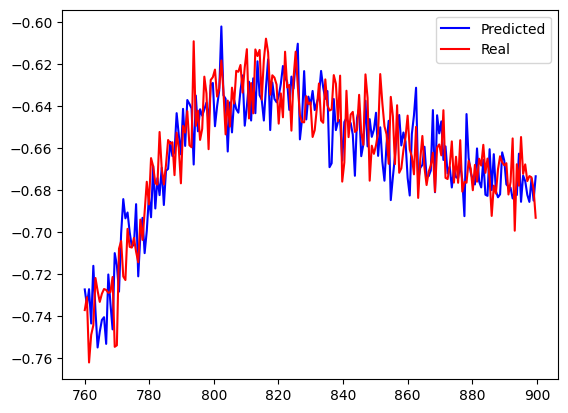

0.0126 [ 0.0675714   0.11554874  0.04510548 -0.03479168] tensor([ 0.0665,  0.1156,  0.0453, -0.0353], dtype=torch.float64)


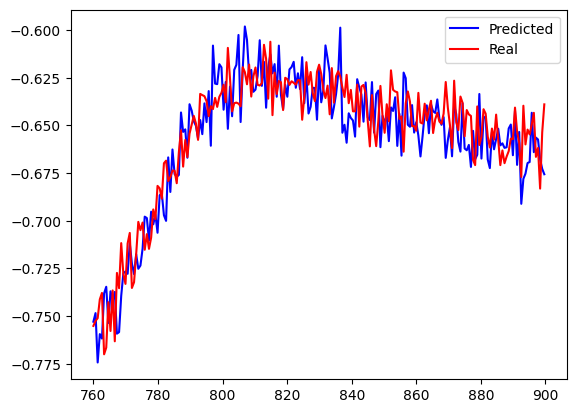

0.0126 [-0.02688774  0.01723647 -0.02082382  0.02371706] tensor([-0.0267,  0.0171, -0.0207,  0.0234], dtype=torch.float64)


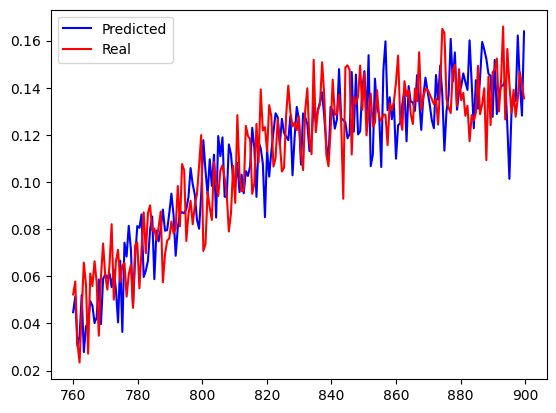

0.0125 [-0.04700912  0.04776534 -0.04628178  0.03617153] tensor([-0.0469,  0.0477, -0.0463,  0.0363], dtype=torch.float64)


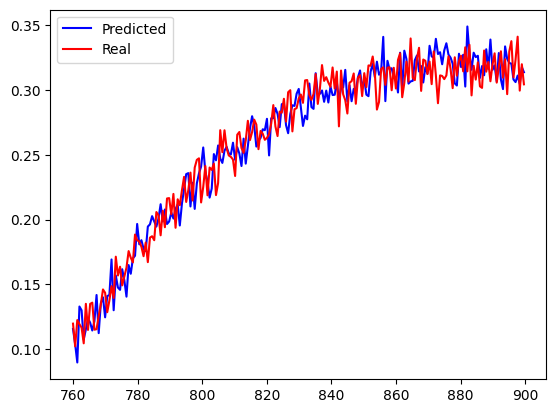

0.0123 [-0.05003212  0.04860019 -0.04039397  0.02997797] tensor([-0.0498,  0.0484, -0.0405,  0.0305], dtype=torch.float64)


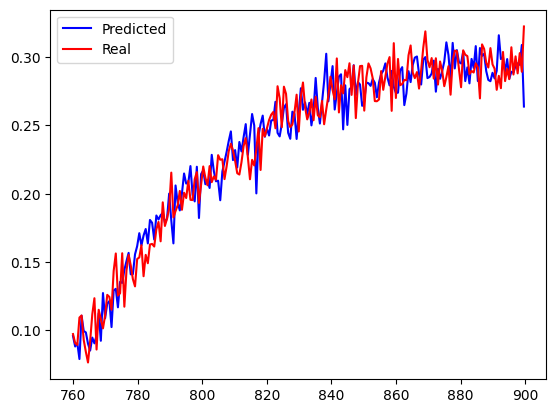

0.0129 [-0.07005195  0.05915154 -0.05279286  0.04290173] tensor([-0.0699,  0.0593, -0.0526,  0.0426], dtype=torch.float64)


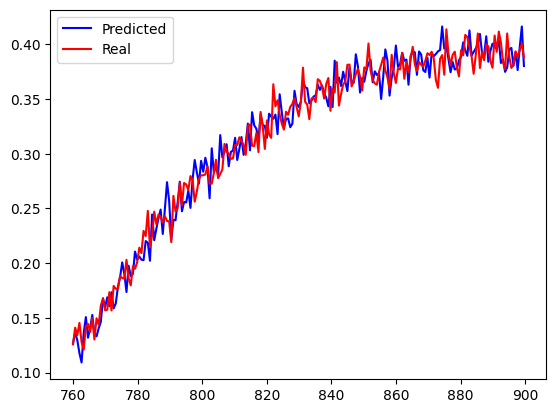

0.0136 [-0.06741565  0.06909364 -0.05193931  0.06042659] tensor([-0.0670,  0.0682, -0.0526,  0.0621], dtype=torch.float64)


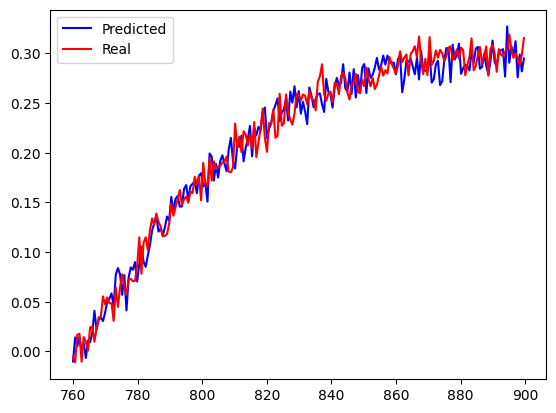

0.0122 [-0.04262128  0.05104928 -0.03528974  0.03651932] tensor([-0.0426,  0.0505, -0.0356,  0.0374], dtype=torch.float64)


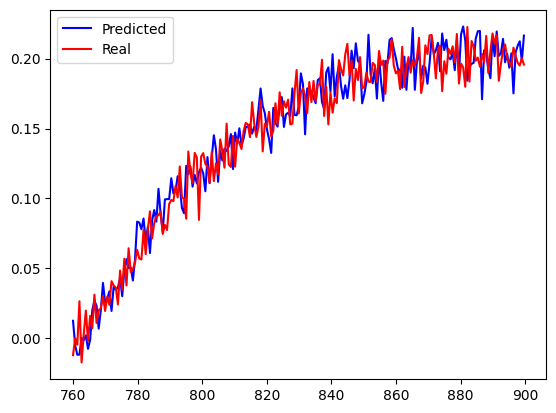

0.0133 [-0.05120771  0.04805526 -0.04481002  0.03915249] tensor([-0.0510,  0.0464, -0.0455,  0.0414], dtype=torch.float64)


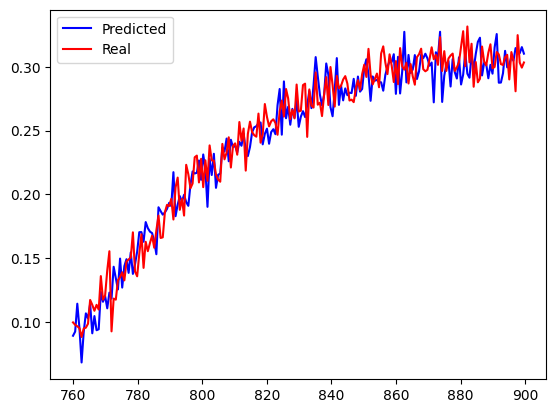

0.0129 [-0.07518452  0.07426886 -0.07201798  0.06386182] tensor([-0.0753,  0.0731, -0.0730,  0.0660], dtype=torch.float64)


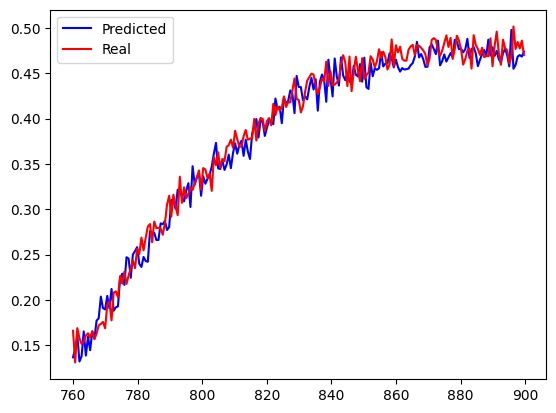

0.0136 [-0.0712278   0.07807717 -0.07972956  0.06978817] tensor([-0.0712,  0.0778, -0.0801,  0.0701], dtype=torch.float64)


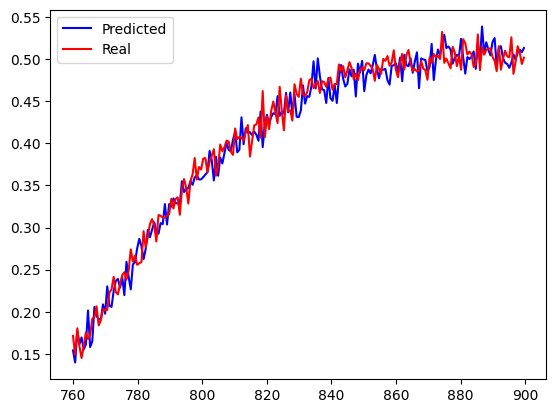

0.0129 [-0.05666552  0.05835987 -0.0779123   0.06756806] tensor([-0.0568,  0.0579, -0.0784,  0.0684], dtype=torch.float64)


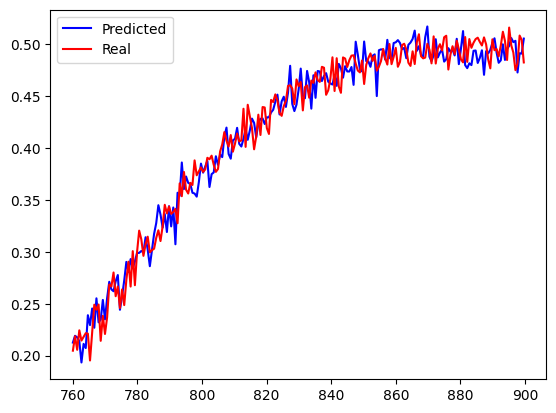

0.0131 [ 0.06573696  0.0020631   0.01940673 -0.00842803] tensor([ 0.0682,  0.0011,  0.0184, -0.0084], dtype=torch.float64)


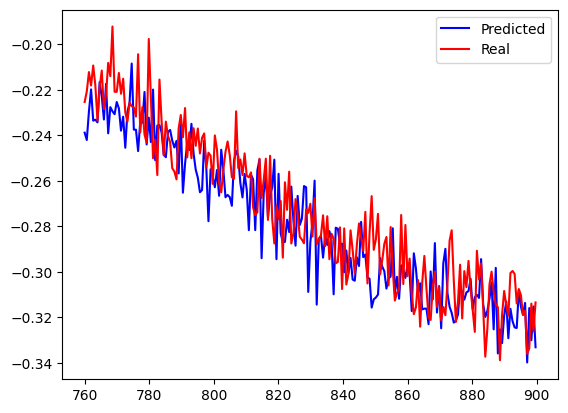

0.0125 [-0.00095528 -0.06462841 -0.01794896  0.00875789] tensor([-0.0004, -0.0648, -0.0179,  0.0079], dtype=torch.float64)


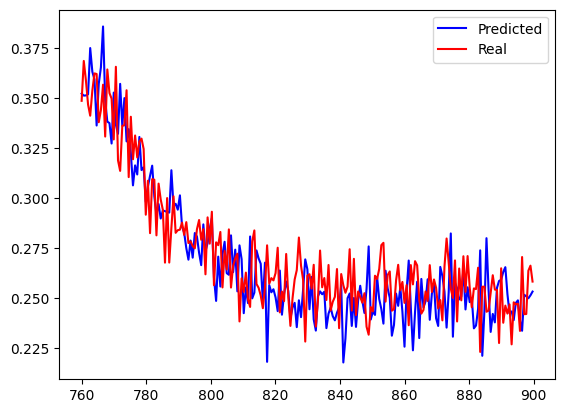

0.0115 [ 0.00248087 -0.06931093 -0.02647317  0.01612291] tensor([ 0.0030, -0.0703, -0.0269,  0.0169], dtype=torch.float64)


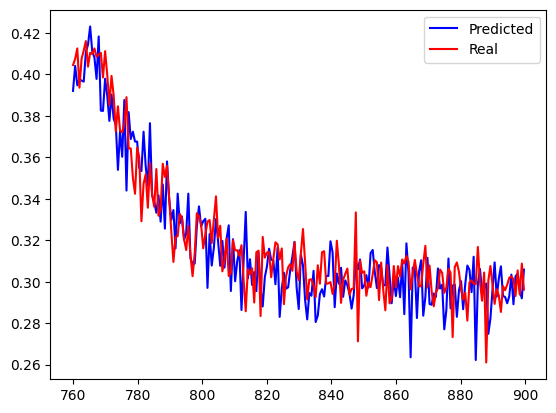

0.0127 [-0.00716604 -0.03774238 -0.03122056  0.02103047] tensor([-0.0068, -0.0383, -0.0316,  0.0216], dtype=torch.float64)


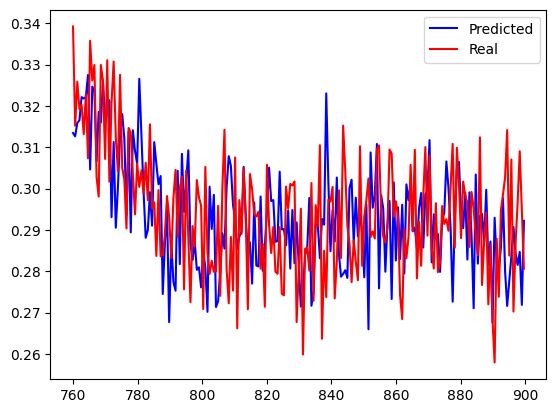

0.0133 [ 0.00285977 -0.0157407   0.00469526 -0.00270953] tensor([ 0.0028, -0.0156,  0.0049, -0.0031], dtype=torch.float64)


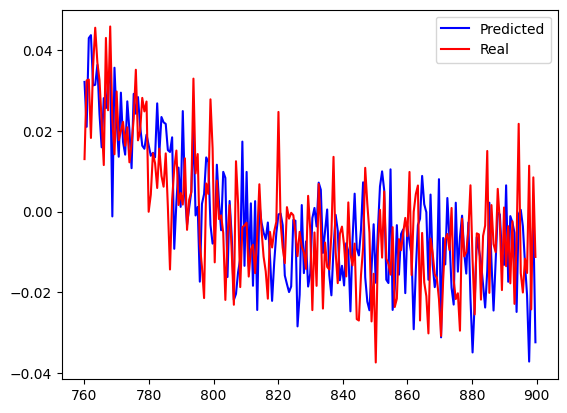

0.0127 [-0.036235    0.01203413  0.00231519 -0.00388621] tensor([-0.0365,  0.0120,  0.0024, -0.0040], dtype=torch.float64)


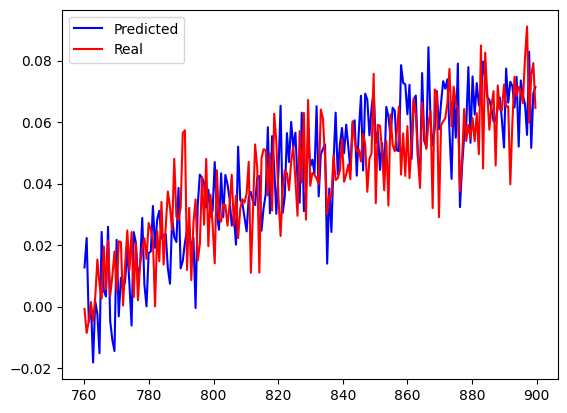

0.012 [-4.8875764e-02  4.1934367e-02  9.7824465e-03  7.7864621e-05] tensor([-0.0489,  0.0419,  0.0098,  0.0002], dtype=torch.float64)


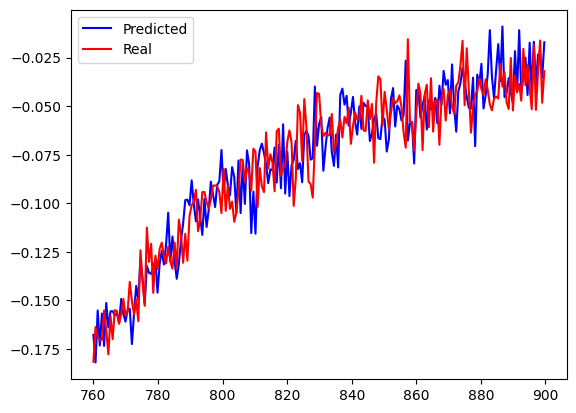

0.013 [-0.07112213  0.03224493  0.00541189  0.00238607] tensor([-0.0712,  0.0316,  0.0052,  0.0035], dtype=torch.float64)


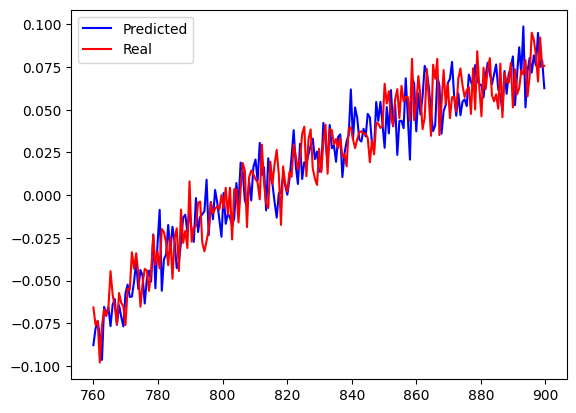

0.0116 [-0.07584762  0.05226777 -0.00634192 -0.00373841] tensor([-0.0756,  0.0521, -0.0063, -0.0037], dtype=torch.float64)


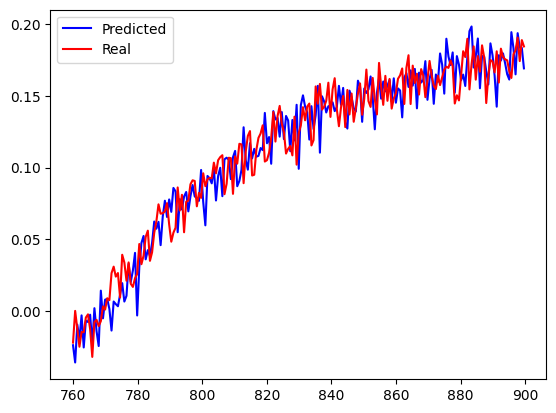

0.0131 [-0.04491754  0.01675237 -0.02534138  0.01537541] tensor([-0.0447,  0.0168, -0.0254,  0.0154], dtype=torch.float64)


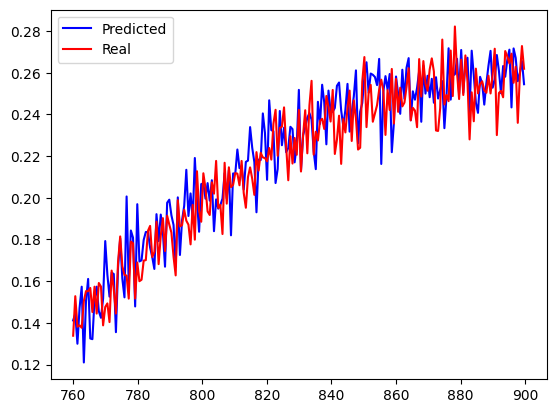

0.0137 [ 0.06747606  0.10480703  0.05207101 -0.04187195] tensor([ 0.0666,  0.1049,  0.0522, -0.0422], dtype=torch.float64)


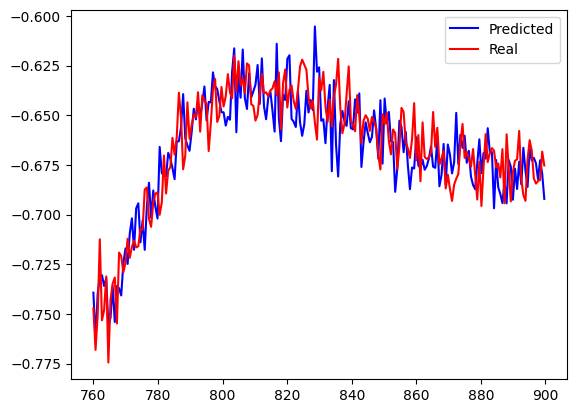

0.012 [ 0.06958783  0.10868519  0.04420319 -0.0339498 ] tensor([ 0.0686,  0.1086,  0.0444, -0.0344], dtype=torch.float64)


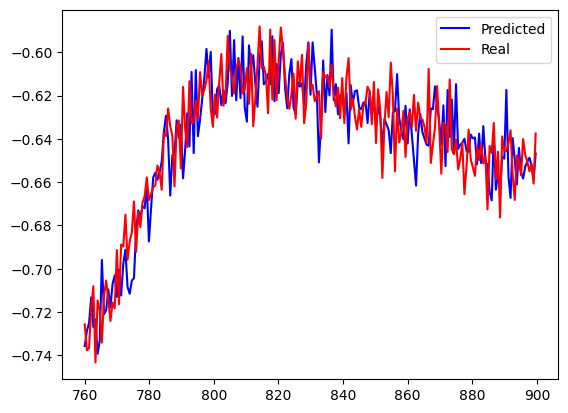

0.0136 [ 0.06017061  0.11471977  0.04667358 -0.0363858 ] tensor([ 0.0591,  0.1148,  0.0469, -0.0369], dtype=torch.float64)


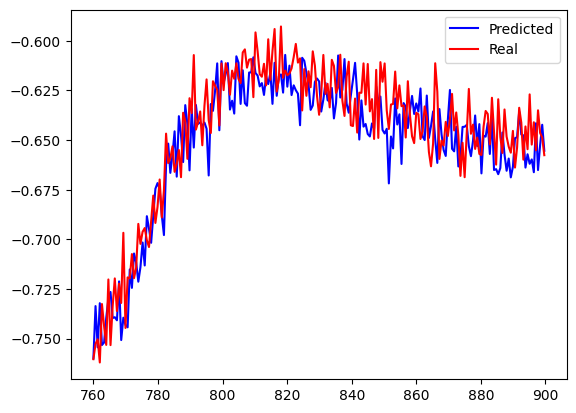

0.014 [-0.04480813  0.03953462 -0.03500278  0.02632726] tensor([-0.0444,  0.0400, -0.0347,  0.0254], dtype=torch.float64)


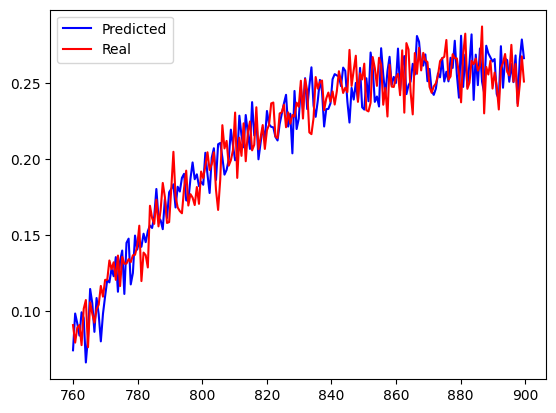

0.013 [-0.04972721  0.04452495 -0.03495175  0.0275069 ] tensor([-0.0497,  0.0440, -0.0352,  0.0284], dtype=torch.float64)


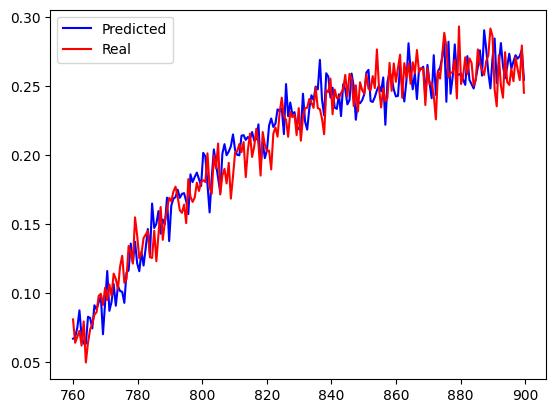

0.012 [-0.05727663  0.04745314 -0.05151062  0.04134826] tensor([-0.0571,  0.0475, -0.0516,  0.0416], dtype=torch.float64)


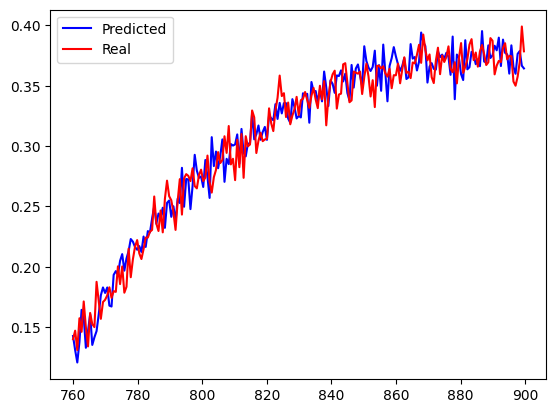

0.0119 [-0.05924     0.06329144 -0.04767308  0.05160865] tensor([-0.0593,  0.0629, -0.0479,  0.0524], dtype=torch.float64)


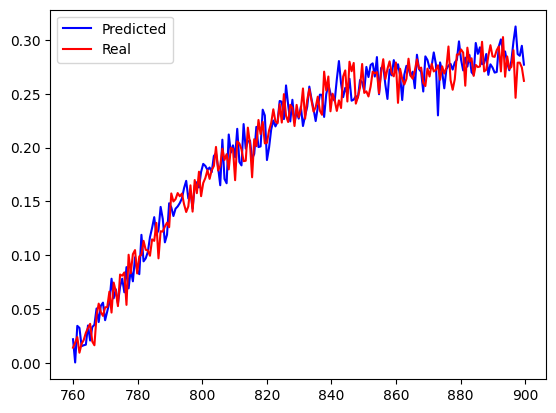

0.0133 [-0.04242779  0.05814207 -0.04136983  0.03371953] tensor([-0.0424,  0.0576, -0.0416,  0.0346], dtype=torch.float64)


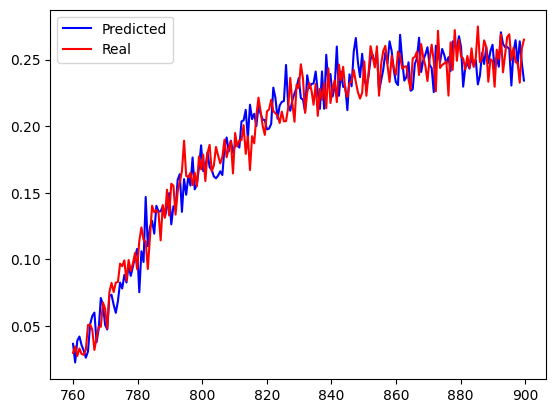

In [6]:
for i in range(len(preds)):
    if i % 1000 == 0:
        a = np.asarray(np.log(beerlamb_multi(molecules, x, preds[i], left_cut)))
        b = np.asarray(np.log(beerlamb_multi(molecules, x, targets[i], left_cut)))
        err = np.mean(np.abs(a - b))
        print(np.around(err, 4), preds[i], targets[i])

        plt.plot(x, np.log(beerlamb_multi(molecules, x, preds[i], left_cut)), color='b', label='Predicted')
        plt.plot(x, np.log(beerlamb_multi(molecules, x, targets[i], left_cut)), color='r', label='Real')
        plt.legend()
        plt.show()

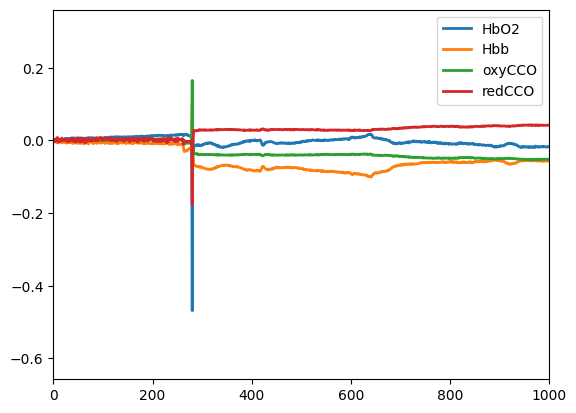

In [32]:
 def plot_diff_molecule(cut=1000):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    coef = ["HbO2", "Hbb", "oxyCCO", "redCCO"]
    for i in range(4):
        plt.plot(preds_cut[:, i], color=colors[i], label=coef[i], linewidth=2)

    plt.xlim([0, cut])
    plt.legend()
    
plot_diff_molecule(1000)